# Исследование рынка заведений общественного питания Москвы

<a id="Начало"></a>

<div style="border:solid black 2px; padding: 20px">

Проведем исследовательский анализ рынка заведений общественного питания Москвы.

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.


**Цели исследования:**
* Подготовить исследование рынка Москвы.
* Найти интересные особенности и презентовать полученные результаты.
* Дать рекомендации по выбору подходящего инвесторам места.


**Ход исследования**

Данные о поведении пользователей получили из файла `moscow_places.csv`. О качестве данных нам ничего не известно. Поэтому передначалом исследованияз проведем обзор данных. 

Таким образом, исследование пройдёт в несколько этапов:
1. [Загрузка и обзор данных](#загрузка)
2. [Предобработка данных](#предобработка)
3. [Исследовательский анализ данных](#исследовательский)
4. [Детализация исследования: открытие кофейни](#детализация)
5. [Презентация исследования для инвесторов](#презентация)
7. [Итоги исследования](#итоги)

**Описание данных**

Файл *moscow_places.csv*:
* name — название заведения;
* address — адрес заведения;
* category — категория заведения, наприме,р «кафе», «пиццерия» или «кофейня»;
* hours — информация о днях и часах работы;
* lat — широта географической точки, в которой находится заведение;
* lng — долгота географической точки, в которой находится заведение;
* rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* price — категория цен в заведении, наприме,р «средние», «ниже среднего», «выше среднего» и так далее;
* avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона;
* middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
* middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»;
* chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 0 — заведение не является сетевым и 1 — заведение является сетевым;
* district — административный район, в котором находится заведение, наприме,р Центральный административный округ;
* seats — количество посадочных мест.
ичество посадочных мест.

</div>

[Начало_проекта](#Начало)

<a id="загрузка"></a>

## Загрузка и обзор данных

### Импортируем библиотеки. Считываем данные из csv-файла и сохраняем в переменную

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import re
import json
from folium import Map, Choropleth, Marker
import folium 
from folium.plugins import MarkerCluster 

In [2]:
try:
    data = pd.read_csv('/datasets/moscow_places.csv') 
except:
    data = pd.read_csv('moscow_places.csv')

### Получим общую информацию о таблице

In [3]:
def data_info(data):
    print('-'*50)
    print('Первые 5 строк')
    print('-'*50)
    display(data.head())
    print('-'*50)
    print('Общая информация')
    print('-'*50)
    data.info()
    print('-'*50)
    print('Основные статистические данные')
    print('-'*50)
    display(data.describe().T)
    print('-'*50)
    print('Подсчет пропусков')
    print('-'*50)
    display(data.isna().sum())
    print('-'*50)
    print('Проверка явных дубликатов')
    print('-'*50)
    print(data.duplicated().sum())
    print('-'*50)

In [4]:
data_info(data)

--------------------------------------------------
Первые 5 строк
--------------------------------------------------


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


--------------------------------------------------
Общая информация
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes

,count,mean,std,min,25%,50%,75%,max
lat,8406.0,55.750109,0.069658,55.573942,55.705155,55.753425,55.795041,55.928943
lng,8406.0,37.608570,0.098597,37.355651,37.538583,37.605246,37.664792,37.874466
rating,8406.0,4.229895,0.470348,1.000000,4.100000,4.300000,4.400000,5.000000
middle_avg_bill,3149.0,958.053668,1009.732845,0.000000,375.000000,750.000000,1250.000000,35000.000000
middle_coffee_cup,535.0,174.721495,88.951103,60.000000,124.500000,169.000000,225.000000,1568.000000
chain,8406.0,0.381275,0.485729,0.000000,0.000000,0.000000,1.000000,1.000000
seats,4795.0,108.421689,122.833396,0.000000,40.000000,75.000000,140.000000,1288.000000


--------------------------------------------------
Подсчет пропусков
--------------------------------------------------


name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

--------------------------------------------------
Проверка явных дубликатов
--------------------------------------------------
0
--------------------------------------------------


<div style="border:solid green 2px; padding: 20px">

Структура:
* Количество строк: 8406.
* Количество столбцов: 14.
* Типы данных: object (7 столбцов), float64 (6 столбцов), int64 (1 столбец).
* Пропуски в 6 столбцах: hours, price, avg_bill, middle_avg_bill, middle_coffee_cup, seats.
* Явных дубликатов нет.
* Все столбцы имеют корректный тип данных, кроме столбца seats, изменим тип данных на int.

В предобработке данных рассмотрим комментарии выше.

</div>

[Начало_проекта](#Начало)

<a id="предобработка"></a>

## Предобработка данных

### Обработка пропущенных значений

<div style="border:solid black 2px; padding: 20px">

**Подсчет пропусков.**

| Столбец          | Количество пропусков| Доля пропусков (%) |  
|:-----------------|:-------------------:|:------------------:|
|hours             | 536                 |6.4                 | 
|price             | 5091                |60.6                | 
|avg_bill          | 4590                |54.6                | 
|middle_avg_bill   | 5257                |62.5                | 
|middle_coffee_cup | 7871                |93.6                | 
|seats             | 3611                |43.0                | 

Большое количество пропусков. Удалять не будем. Рассмотрим замену пропусков на некое значение или оставим как есть в зависимости от конкретного случая.

Ниже рассмотрим каждый столбец с пропусками по отдельности. Попробуем смэчить между собой столбцы и заменить на подходящее значение по возможности.

</div>

In [5]:
# проверяем наличие и долю пропусков
(data.isnull().mean() * 100).round(1)

name                  0.0
category              0.0
address               0.0
district              0.0
hours                 6.4
lat                   0.0
lng                   0.0
rating                0.0
price                60.6
avg_bill             54.6
middle_avg_bill      62.5
middle_coffee_cup    93.6
chain                 0.0
seats                43.0
dtype: float64

#### Пропуски в столбце 'hours'

In [6]:
# функция выводит информацию по значениям в столбце
def column_info(data):
    print('-'*50)
    print('Уникальные значения столбца')
    print('-'*50)
    display(data.sort_values().unique())
    print('-'*50)
    print('Количество уникальных значений')
    print('-'*50)
    display(data.nunique())
    print('-'*50)
    print('Количество уникальных совпадений в столбце (первые 10 строк)')
    print('-'*50)
    display(data.value_counts().reset_index().head(10))
    print('-'*50)

In [7]:
# получим информацию по значениям в столбце
column_info(data['hours'])

--------------------------------------------------
Уникальные значения столбца
--------------------------------------------------


array(['Нет информации',
       'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30',
       'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00',
       ..., 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно',
       'чт-вс 20:00–06:00', nan], dtype=object)

--------------------------------------------------
Количество уникальных значений
--------------------------------------------------


1307

--------------------------------------------------
Количество уникальных совпадений в столбце (первые 10 строк)
--------------------------------------------------


,hours,count
0,"ежедневно, 10:00–22:00",759
1,"ежедневно, круглосуточно",730
2,"ежедневно, 11:00–23:00",396
3,"ежедневно, 10:00–23:00",310
4,"ежедневно, 12:00–00:00",254
5,"ежедневно, 09:00–21:00",204
6,"ежедневно, 09:00–22:00",184
7,"ежедневно, 12:00–23:00",178
8,"ежедневно, 08:00–23:00",160
9,"ежедневно, 08:00–22:00",148


--------------------------------------------------


In [8]:
# заполняем пропуски в столбце значением 'Нет информации'
data['hours'] = data['hours'].fillna('Нет информации')

In [9]:
# проверяем замену
data['hours'].value_counts().head()

hours
ежедневно, 10:00–22:00      759
ежедневно, круглосуточно    730
Нет информации              537
ежедневно, 11:00–23:00      396
ежедневно, 10:00–23:00      310
Name: count, dtype: int64

In [10]:
# проверим пропуски по категориям заведений
data[data['hours'] == 'Нет информации'].groupby('category')['category'].value_counts()

category
бар,паб             18
булочная             7
быстрое питание     33
кафе               376
кофейня             15
пиццерия             5
ресторан            74
столовая             9
Name: count, dtype: int64

<div style="border:solid green 2px; padding: 20px">

Доля пропусков в столбце 'hours' 6.4%. Пропуски присутствуют в разных категориях заведений.

Не можем заменить на некое адекватное среднее значение. 

Заменили на значение 'Нет информации', так как такое значение уже было в данном столбце и нам подходит.

</div>

#### Пропуски в столбце 'seats'

In [11]:
# получим информацию по значениям в столбце
column_info(data['seats'])

--------------------------------------------------
Уникальные значения столбца
--------------------------------------------------


array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.200e+01,
       1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01, 1.800e+01,
       1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.400e+01, 2.500e+01,
       2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.800e+01, 6.000e+01, 6.100e+01, 6.200e+01, 6.300e+01, 6.400e+01,
       6.500e+01, 6.600e+01, 6.700e+01, 6.800e+01, 6.900e+01, 7.000e+01,
       7.200e+01, 7.400e+01, 7.500e+01, 7.600e+01, 7.700e+01, 7.800e+01,
       7.900e+01, 8.000e+01, 8.100e+01, 8.200e+01, 8.300e+01, 8.400e+01,
       8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01, 

--------------------------------------------------
Количество уникальных значений
--------------------------------------------------


229

--------------------------------------------------
Количество уникальных совпадений в столбце (первые 10 строк)
--------------------------------------------------


,seats,count
0,40.0,253
1,100.0,213
2,60.0,175
3,50.0,168
4,80.0,160
5,120.0,141
6,0.0,136
7,30.0,128
8,45.0,127
9,70.0,126


--------------------------------------------------


In [12]:
# проверим нулевые значения по категориям заведений
data[data['seats'] == 0].groupby('category')['category'].value_counts()

category
бар,паб             4
булочная           11
быстрое питание    18
кафе               44
кофейня            24
пиццерия           10
ресторан           20
столовая            5
Name: count, dtype: int64

<div style="border:solid green 2px; padding: 20px">

Доля пропусков в столбце 'seats' 43%.

Не можем заменить на некое адекватное среднее значение. Также не можем заменить на '0', так как заведения с таким значением в таблице уже есть и есть вероятность, что в данных заведениях действительно нет посадочных мест (например, еда на вынос).

Поэтому оставляем пропуски как есть.

</div>

#### Пропуски в столбце 'price'

In [13]:
# получим информацию по значениям в столбце
column_info(data['price'])

--------------------------------------------------
Уникальные значения столбца
--------------------------------------------------


array(['высокие', 'выше среднего', 'низкие', 'средние', nan], dtype=object)

--------------------------------------------------
Количество уникальных значений
--------------------------------------------------


4

--------------------------------------------------
Количество уникальных совпадений в столбце (первые 10 строк)
--------------------------------------------------


,price,count
0,средние,2117
1,выше среднего,564
2,высокие,478
3,низкие,156


--------------------------------------------------


In [14]:
# заполняем пропуски в столбце значением 'Нет информации'
data['price'] = data['price'].fillna('Нет информации')

<div style="border:solid green 2px; padding: 20px">

Доля пропусков в столбце 'price' 60.6%.

Заменили пропуски значением 'Нет информации'.

</div>

#### Пропуски в столбце 'avg_bill'

In [15]:
# функция выводит информацию по значениям в столбце
def column_info_1(data):
    print('-'*50)
    print('Количество уникальных значений')
    print('-'*50)
    display(data.nunique())
    print('-'*50)
    print('Количество уникальных совпадений в столбце (первые 10 строк)')
    print('-'*50)
    display(data.value_counts().reset_index().head(10))
    print('-'*50)

# получим информацию по значениям в столбце
column_info_1(data['avg_bill'])

--------------------------------------------------
Количество уникальных значений
--------------------------------------------------


897

--------------------------------------------------
Количество уникальных совпадений в столбце (первые 10 строк)
--------------------------------------------------


,avg_bill,count
0,Средний счёт:1000–1500 ₽,241
1,Средний счёт:1500–2000 ₽,120
2,Средний счёт:300–500 ₽,90
3,Средний счёт:500–1000 ₽,78
4,Средний счёт:1500–2500 ₽,68
5,Средний счёт:700–1000 ₽,50
6,Средний счёт:от 1500 ₽,48
7,Средний счёт:1500 ₽,43
8,Средний счёт:1000 ₽,43
9,Цена чашки капучино:239–274 ₽,43


--------------------------------------------------


In [16]:
# заполняем пропуски в столбце значением 'Нет информации'
data['avg_bill'] = data['avg_bill'].fillna('Нет информации')

<div style="border:solid green 2px; padding: 20px">

Доля пропусков в столбце 'avg_bill' 54.6%.

Заменили пропуски значением 'Нет информации'.

</div>

#### Пропуски в столбце 'middle_avg_bill'

In [17]:
# получим информацию по значениям в столбце
column_info_1(data['middle_avg_bill'])

--------------------------------------------------
Количество уникальных значений
--------------------------------------------------


230

--------------------------------------------------
Количество уникальных совпадений в столбце (первые 10 строк)
--------------------------------------------------


,middle_avg_bill,count
0,1250.0,247
1,1000.0,175
2,300.0,148
3,1500.0,146
4,400.0,134
5,1750.0,130
6,500.0,126
7,750.0,100
8,2000.0,95
9,350.0,91


--------------------------------------------------


<div style="border:solid green 2px; padding: 20px">

Доля пропусков в столбце 'middle_avg_bill' 62.5%.

Не можем заменить на некое среднее значение, так как это сильно исказит данные.

Оставляем пропуски как есть.

</div>

#### Пропуски в столбце 'middle_coffee_cup'

In [18]:
# получим информацию по значениям в столбце
column_info_1(data['middle_coffee_cup'])

--------------------------------------------------
Количество уникальных значений
--------------------------------------------------


96

--------------------------------------------------
Количество уникальных совпадений в столбце (первые 10 строк)
--------------------------------------------------


,middle_coffee_cup,count
0,256.0,43
1,60.0,33
2,95.0,32
3,150.0,24
4,170.0,18
5,200.0,18
6,250.0,15
7,225.0,15
8,135.0,14
9,120.0,13


--------------------------------------------------


<div style="border:solid green 2px; padding: 20px">

Доля пропусков в столбце 'middle_coffee_cup' 93.6%.

Не можем заменить на некое среднее значение, так как это сильно исказит данные.


Оставляем пропуски как есть.

</div>

#### Итоги по пропущенным значениям

In [19]:
# проверяем наличие и долю пропусков
(data.isnull().mean() * 100).round(1)

name                  0.0
category              0.0
address               0.0
district              0.0
hours                 0.0
lat                   0.0
lng                   0.0
rating                0.0
price                 0.0
avg_bill              0.0
middle_avg_bill      62.5
middle_coffee_cup    93.6
chain                 0.0
seats                43.0
dtype: float64

<div style="border:solid green 2px; padding: 20px">

**Пропуски.**

| Столбец          | Комментарий                                             | Доля пропусков (%) | Доля пропусков после замены (%) | 
|:-----------------|:--------------------------------------------------------|:------------------:|:-------------------------------:|
|hours             | Замена на 'Нет информации'                              |6.4                 | 0                               |
|price             | Замена на 'Нет информации' и замена с подбором значения |60.6                | 0                               |
|avg_bill          | Замена на 'Нет информации'                              |54.6                | 0                               |
|middle_avg_bill   | Оставили как есть                                       |62.5                | 62.5                            |
|middle_coffee_cup | Оставили как есть                                       |93.6                | 93.6                            |
|seats             | Оставили как есть                                       |43.0                | 43.0                            |

При проверке выявили большое количество пропусков. Не удаляли строки с пропусками.

В таблице выше комментарии по работе с пропусками в каждом из столбцов.

</div>

### Изменение типов данных

<div style="border:solid black 2px; padding: 20px">

seats: Dtype float64. Изменить Dtype на int. Посадочное место - это целое число.

</div>

In [20]:
data['seats'] = pd.array(data['seats'], dtype=pd.Int64Dtype())
data['seats'].dtypes

Int64Dtype()

In [21]:
data['seats'].sort_values().unique()

<IntegerArray>
[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
 ...
  644,  650,  660,  675,  760,  920, 1040, 1200, 1288, <NA>]
Length: 230, dtype: Int64

### Проверка неявных дубликатов

#### Общая проверка неявных дубликатов

In [22]:
data['category'].value_counts() # просмотр уникальных значений и количество строк

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

In [23]:
data['district'].value_counts() # просмотр уникальных значений и количество строк

district
Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

In [24]:
data['chain'].value_counts() # просмотр уникальных значений и количество строк

chain
0    5201
1    3205
Name: count, dtype: int64

In [25]:
data['name'].value_counts() # просмотр уникальных значений и количество строк

name
Кафе                189
Шоколадница         120
Домино'с Пицца       76
Додо Пицца           74
One Price Coffee     71
                   ... 
Сащя                  1
Мой дом               1
Stardogs              1
Bar Park 15           1
Kebab Time            1
Name: count, Length: 5614, dtype: int64

In [26]:
data['address'].value_counts() # просмотр уникальных значений и количество строк

address
Москва, проспект Вернадского, 86В                                                                      28
Москва, Усачёва улица, 26                                                                              26
Москва, площадь Киевского Вокзала, 2                                                                   20
Москва, Ярцевская улица, 19                                                                            20
Москва, Каширское шоссе, 61Г                                                                           16
                                                                                                       ..
Москва, улица Герасима Курина, 6                                                                        1
Москва, Кутузовский проспект, 36, стр. 5                                                                1
Москва, улица Мнёвники, 11                                                                              1
Москва, Западный административный окру

<div style="border:solid green 2px; padding: 20px">

В столбцах 'category', 'district', 'chain'  неявных дубликатов нет.

В стоблцах 'name' и 'address' большое количество значений. Ряд названий и адресов встречаются больше 1 раза. Для названий - это вероятно сетевые заведения, для адресов вероятно торговые центры, где находится не одно заведение.

</div>

In [27]:
# приводим названия заведений к единому стилю

def remove_name(name):
    name_update = name.strip()
    name_update = name.lower()
    name_update = re.sub('\W', ' ', name_update)
    return name_update

data['name'] = data['name'].apply(remove_name)

data[['name']].tail(10)

,name
8396,пекинский двор
8397,траектория крафт кафе
8398,на волгина
8399,пекарня кафе гриль
8400,практика кофе
8401,суши мания
8402,миславнес
8403,самовар
8404,чайхана sabr
8405,kebab time


#### Проверка 1 уникальный адрес = 1 уникальный объект

In [28]:
# Добавляем столбец для определения дубликатов по
# первому слову в названии, адресу, категории, без корпуса дома, строчным буквам в итоговой ячейке
data['name_address_lower'] = data['name'].str.split(r' ').str[0] + data['address'].str.split(r',').str[0]\
                             + data['address'].str.split(r',').str[1]\
                             + data['address'].str.split(r',').str[2]\
                             + data['category']
data['name_address_lower'] = data['name_address_lower'].str.lower()
print('Дубликаты проверка (первое слово названия, адрес без корпуса, строчные буквы):',
      len(data[data.duplicated(['name_address_lower'])]))

Дубликаты проверка (первое слово названия, адрес без корпуса, строчные буквы): 130


In [29]:
# Создаем лист для удаления дубликатов
list_duplicated = data[data.duplicated(['name_address_lower'])]['name_address_lower']
list_duplicated = pd.DataFrame(list_duplicated)
list_duplicated = list_duplicated['name_address_lower'].unique()

data.query('name_address_lower in @list_duplicated').sort_values(by='name_address_lower').head(6)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,name_address_lower
2866,dragon mixology bar,кафе,"Москва, Щёлковское шоссе, вл75",Восточный административный округ,"ежедневно, 10:00–22:00",55.810949,37.799413,3.8,Нет информации,Нет информации,NaN,NaN,0,<NA>,dragonмосква щёлковское шоссе вл75кафе
2719,dragon bubble tea,кафе,"Москва, Щёлковское шоссе, вл75",Восточный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.810949,37.799413,4.0,Нет информации,Нет информации,NaN,NaN,0,<NA>,dragonмосква щёлковское шоссе вл75кафе
7635,estetica,кафе,"Москва, Кировоградская улица, 15",Южный административный округ,"ежедневно, 10:00–22:00",55.609389,37.605081,4.2,Нет информации,Нет информации,NaN,NaN,0,60,esteticaмосква кировоградская улица 15кафе
7743,estetica cafe,кафе,"Москва, Кировоградская улица, 15",Южный административный округ,"ежедневно, 10:00–22:00",55.609390,37.605087,4.3,Нет информации,Нет информации,NaN,NaN,0,60,esteticaмосква кировоградская улица 15кафе
5484,gentleman coffee,кофейня,"Москва, Смирновская улица, 25, стр. 10",Юго-Восточный административный округ,пн-пт 08:00–19:00,55.736780,37.713052,4.3,Нет информации,Нет информации,NaN,NaN,1,<NA>,gentlemanмосква смирновская улица 25кофейня
5470,gentleman coffee,кофейня,"Москва, Смирновская улица, 25, стр. 3",Юго-Восточный административный округ,пн-пт 08:00–19:00,55.736135,37.714328,4.3,Нет информации,Нет информации,NaN,NaN,1,<NA>,gentlemanмосква смирновская улица 25кофейня


In [30]:
# Удаляем дубликаты и делаем проверку по количеству удаленных строк
len_before = len(data)
data = data.drop_duplicates(subset=['name_address_lower'])
print('Разница строк после удаления дубликатов (проверка):', len_before - len(data))

Разница строк после удаления дубликатов (проверка): 130


<div style="border:solid green 2px; padding: 20px">

Проверка по дубликатам:
* Взяли первое слово названия заведения
* Из адреса удалили корпус
* Написали все строчными буквами.

При данной проверке обнаружили 130 дубликатов (по-разному  написано одно название заведения, в адресе где-то отсутствует корпус).

Данные дубликаты удалили из итоговой таблицы.

</div>

### Проверка названий заведений по принадлежности к сетям

<div style="border:solid black 2px; padding: 20px">

Проверим соответствие названия заведения и его принадлежность к сетям.

</div>

In [31]:
# построим сводную по названию, принадлежности к сетям и количеству заведений
name_chain = data.pivot_table(index=['name', 'chain'] , values='category', aggfunc='count')\
                 .sort_values('category', ascending=False)\
                 .reset_index().rename(columns= {'category': 'Количество заведений'})
name_chain

,name,chain,Количество заведений
0,кафе,0,179
1,шоколадница,1,120
2,домино с пицца,1,76
3,додо пицца,1,74
4,яндекс лавка,1,72
...,...,...,...
5457,баяр,0,1
5458,башлам,0,1
5459,бахытик,0,1
5460,баффет,0,1


In [32]:
# выберем точки, которых больше 1 (условно сети) и которые имеют признак того, что это не сети
name_chain_0 = name_chain[(name_chain['Количество заведений'] > 1) & (name_chain['chain'] == 0)]
list_name_chain_0 = name_chain_0['name'].unique()
list_name_chain_0

array(['кафе', 'шаурма', 'ресторан', 'столовая', 'бистро', 'кофейня',
       'кафе столовая', 'буфет', 'трапезная', 'шашлычная',
       'поминальные обеды', 'пиццерия', 'чудо печка',
       'ku  рамен изакая бар', 'токио рамен', 'вьет лотос', 'между булок',
       'han cook', 'гюмри хауз', 'хинкали point', 'хинкали gали',
       'hellopapaya', 'istanbul kebab', 'гастроферма',
       'гастрорюмочная шесть you шесть', 'ма ми', 'греки здесь',
       'i like wine', 'il pizzaiolo', 'папан', 'аль бухари',
       'пицца фабрика', 'практика кофе', 'vabene', 'авлабар', 'ням ням',
       'нэм нэм', 'важная персона', 'вкусвилл  кафе', 'новатор кофе',
       'новая столовая', 'блины', 'семейная пекарня', 'pomodoro royal',
       'бишкек сити', 'pinzeria by bontempi', 'советские времена',
       'на углях', 'pasta cup   pizza', 'кафе шашлык', 'кафе кулинария',
       'кафе кондитерская', 'чайхона ош сити', 'донер тандыр',
       'хочу хычин', 'донер бистро', 'донер   гриль', 'здоровое питание',
   

In [33]:
# выберем заведения, у которых 1 точка и которые имеют признак того, что это сети
name_chain_1 = name_chain[(name_chain['Количество заведений'] < 2) & (name_chain['chain'] == 1)]
list_name_chain_1 = name_chain_1['name'].unique()
list_name_chain_1

array(['парк', 'пион', 'пицца экспресс', 'китчен', 'кинобар',
       'пекарня   1', 'пивбар', 'лагман', 'лаки сувлаки',
       'любовь и сладости', 'ливан хаус', 'кофейник', 'кофе пью',
       'мясо на углях', 'мореморе', 'миндаль', 'крепери', 'харчевниковъ',
       'хинкали', 'чай', 'чайная высота', 'чабан чуду', 'чайхана азия',
       'уйгурский лагман', 'шашлыки', 'чайхана халаль', 'чайхана хан',
       'чао пицца', 'рома', 'роллофф', 'прованс', 'поминальная трапеза',
       'радуга', 'суши wok', 'суши таун', 'суши пицца 312', 'трактир',
       'трдельникъ', 'сириус', 'more poke', 'kaya coffee shop', 'home',
       'kimpab', 'ricers', 'one special', 'ploveberry', '1 я креветочная',
       '4 сезона', 'bigсуши', 'bakery', 'halal food', 'gentleman coffee',
       'easy pizza', 'drive', 'дастархан', 'дайнинг холл', 'гриль парк',
       'диана', 'городок', 'wаурма', 'zafferano', 'tasty thai', 'suшi',
       'vintage', 'виолино', 'веранда', 'бюро пиццы', 'в своей тарелке',
       'баку',

<div style="border:solid green 2px; padding: 20px">

Проверили заведения, у которых название встречается больше 1 раза. Ряд заведений имеют признак "несетевое заведение". Исходя из того, что названия не претендуют на уникальность (например, Кафе, Шаурма), можно сделать вывод, что это корректные данные.

Проверили заведения, у которых название встречается меньше 1 раза. Ряд заведений имеют признак "сетевое заведение", при этом представлены только 1 объектом. Изучили на карте выборочные точки из списка: одни закрыты, другие небольшие единичные точки или в Москве одна точка, и еще несколько в других городах. В даннных не стали менять признак, так как у нас не хватает понимания, насколько важно нам, чтобы в Москве было несколько точек или нет.

</div>

### Замена категорий у топ-15 популярных сетей в Москве

<div style="border:solid black 2px; padding: 20px">

В исследовательской части обнаружили, что у ряда названий сетей, которые попали в топ-15, оказались разные категории. Рассмотрели все названия таких сетей по отдельности, чтобы по возможности привести к единой корректной категории.

* Заменили категорию на единую по большинству значений (Шоколадница, Prime, Буханка, CofeFest, Му-Му).
* Ничего не меняли (Хинкальная - много видов категорий. 43 объекта итого. На сайте Хинкальная№1 сейчас 18 реальных объектов одной сети. Аналогичная история по сети Чайхана).

</div>

In [34]:
top_15_name = data[data['chain'] == 1]\
             .pivot_table(index='name', values='chain', aggfunc='count')\
             .sort_values(by='chain', ascending=False).reset_index()\
             .rename(columns = {'name': 'Название заведения', 'chain': 'Количество объектов'})\
             .head(15)
list_name_top = top_15_name['Название заведения'].unique()
top_15_name

,Название заведения,Количество объектов
0,шоколадница,120
1,домино с пицца,76
2,додо пицца,74
3,яндекс лавка,72
4,one price coffee,70
5,cofix,65
6,prime,50
7,хинкальная,43
8,кофепорт,40
9,теремок,38


In [35]:
top_15_name_category = data[data['name'].isin(list_name_top)]\
             .pivot_table(index=['name', 'category'], values='chain', aggfunc='count')\
             .sort_values(by='chain', ascending=False).reset_index()\
             .rename(columns = {'name': 'Название заведения',
                                'chain': 'Количество объектов', 'category': 'Категория'})
top_15_name_category.head(15)

,Название заведения,Категория,Количество объектов
0,шоколадница,кофейня,119
1,домино с пицца,пиццерия,77
2,додо пицца,пиццерия,74
3,яндекс лавка,ресторан,72
4,one price coffee,кофейня,71
5,cofix,кофейня,65
6,prime,ресторан,49
7,кофепорт,кофейня,40
8,кулинарная лавка братьев караваевых,кафе,38
9,теремок,ресторан,36


In [36]:
# меняем значения в 'category' для тех, у кого несколько категорий на самую популярную в данных
data['category'] = np.where(data['name'].isin(['шоколадница']), 'кофейня', data['category'])
data['category'] = np.where(data['name'].isin(['prime']), 'ресторан', data['category'])
data['category'] = np.where(data['name'].isin(['теремок']), 'ресторан', data['category'])
data['category'] = np.where(data['name'].isin(['буханка']), 'булочная', data['category'])
data['category'] = np.where(data['name'].isin(['cofefest']), 'кофейня', data['category'])
data['category'] = np.where(data['name'].isin(['му му']), 'кафе', data['category'])

In [37]:
top_15_name_category = data[data['name'].isin(list_name_top)]\
             .pivot_table(index=['name', 'category'], values='chain', aggfunc='count')\
             .sort_values(by='chain', ascending=False).reset_index()\
             .rename(columns = {'name': 'Название заведения',
                                'chain': 'Количество объектов', 'category': 'Категория'})
top_15_name_category.head(15)

,Название заведения,Категория,Количество объектов
0,шоколадница,кофейня,120
1,домино с пицца,пиццерия,77
2,додо пицца,пиццерия,74
3,яндекс лавка,ресторан,72
4,one price coffee,кофейня,71
5,cofix,кофейня,65
6,prime,ресторан,50
7,кофепорт,кофейня,40
8,теремок,ресторан,38
9,кулинарная лавка братьев караваевых,кафе,38


### Количество заведений после предобработки

In [38]:
print('Количество заведений после предобработки:', len(data))
print('Количество уникальных названий заведений:', len(data['name'].unique()))
print('Количество уникальных названий заведений (сетевые):',
      len(data[data['chain'] == 1]['name'].unique()))
print('Количество уникальных названий заведений (несетевые):',
      len(data[data['chain'] == 0]['name'].unique()))

Количество заведений после предобработки: 8276
Количество уникальных названий заведений: 5419
Количество уникальных названий заведений (сетевые): 741
Количество уникальных названий заведений (несетевые): 4721


### Добавление столбцов

#### Добавление столбца 'all'

In [39]:
# добавим столбец с условным названием 'all' для удобства построения сводных
data['all'] = 'all'
data.head(2)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,name_address_lower,all
0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,Нет информации,Нет информации,NaN,NaN,0,<NA>,wowфлимосква улица дыбенко 7/1кафе,all
1,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4,четыремосква улица дыбенко 36ресторан,all


#### Добавление столбца 'street'

<div style="border:solid black 2px; padding: 20px">

Создадим столбец 'street' с названиями улиц из столбца с адресом.

</div>

In [40]:
data['street'] = data['address'].str.split(r',').str[1]
data.head(2)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,name_address_lower,all,street
0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,Нет информации,Нет информации,NaN,NaN,0,<NA>,wowфлимосква улица дыбенко 7/1кафе,all,улица Дыбенко
1,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4,четыремосква улица дыбенко 36ресторан,all,улица Дыбенко


#### Добавление столбца 'is_24_7'

<div style="border:solid black 2px; padding: 20px">

Создадим столбец 'is_24_7' с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
* логическое значение True — если заведение работает ежедневно и круглосуточно;
* логическое значение False — в противоположном случае.

</div>

In [41]:
data['hours'].value_counts().head(10)

hours
ежедневно, 10:00–22:00      733
ежедневно, круглосуточно    725
Нет информации              514
ежедневно, 11:00–23:00      392
ежедневно, 10:00–23:00      309
ежедневно, 12:00–00:00      254
ежедневно, 09:00–21:00      198
ежедневно, 09:00–22:00      180
ежедневно, 12:00–23:00      178
ежедневно, 08:00–23:00      159
Name: count, dtype: int64

In [42]:
# функция возвращает категорию по значению от hours, используя правила:
def type_hours(row): 
    if row['hours'] == 'ежедневно, круглосуточно':
        return True
    elif row['hours'] == 'Нет информации':
        return np.nan
    return False

data['is_24_7'] = data.apply(type_hours, axis=1) # добавляем новый столбец

# проверяем новый столбец
data['is_24_7'].value_counts()

is_24_7
False    7037
True      725
Name: count, dtype: int64

In [43]:
# проверяем, что пропуски также отображены
data['is_24_7'].isnull().sum()

514

#### Добавление столбца 'district_type'

<div style="border:solid black 2px; padding: 20px">

Для удобства визуализации добавим столбец с аббревиатурой районов.

</div>

In [44]:
# функция возвращает категорию по значению от district, используя правила:
def type_district(row): 
    if row['district'] == 'Центральный административный округ':
        return 'ЦАО'
    elif row['district'] == 'Северный административный округ':
        return 'САО'
    elif row['district'] == 'Северо-Восточный административный округ':
        return 'СВАО'
    elif row['district'] == 'Южный административный округ':
        return 'ЮАО'
    elif row['district'] == 'Западный административный округ':
        return 'ЗАО'
    elif row['district'] == 'Восточный административный округ':
        return 'ВАО'
    elif row['district'] == 'Юго-Западный административный округ':
        return 'ЮЗАО'
    elif row['district'] == 'Юго-Восточный административный округ':
        return 'ЮВАО'
    elif row['district'] == 'Северо-Западный административный округ':
        return 'СЗАО'
    return 'Нет данных'

data['district_type'] = data.apply(type_district, axis=1) # добавляем новый столбец

# проверяем категоризацию
data.groupby([data['district_type'], 'district'])['name'].agg('count')

district_type  district                               
ВАО            Восточный административный округ            779
ЗАО            Западный административный округ             838
САО            Северный административный округ             886
СВАО           Северо-Восточный административный округ     878
СЗАО           Северо-Западный административный округ      403
ЦАО            Центральный административный округ         2223
ЮАО            Южный административный округ                875
ЮВАО           Юго-Восточный административный округ        696
ЮЗАО           Юго-Западный административный округ         698
Name: name, dtype: int64

#### Добавление столбца 'rating_type'

<div style="border:solid black 2px; padding: 20px">

Добавим категоризацию по рейтингу.

</div>

In [45]:
# функция возвращает категорию по значению от rating, используя правила:
def type_rating(row): 
    if row['rating'] > 4.5:
        return '4.6-5'
    elif row['rating'] > 3.9:
        return '4-4.5'
    elif row['rating'] > 2.9:
        return '3-3.9' 
    elif row['rating'] > 0:
        return '0-2.9' 
    return 'нет оценки'

data['rating_type'] = data.apply(type_rating, axis=1) # добавляем новый столбец

# проверяем категоризацию
data.groupby([data['rating_type'], 'rating'])['name'].agg('count')

rating_type  rating
0-2.9        1.0         10
             1.1         14
             1.3         11
             1.4         11
             1.5          2
             1.6          2
             1.7          6
             1.8          2
             1.9          4
             2.0          4
             2.1          4
             2.2         13
             2.3         14
             2.4         11
             2.5         13
             2.6         15
             2.7         10
             2.8         27
             2.9         31
3-3.9        3.0         23
             3.1         36
             3.2         38
             3.3         52
             3.4         67
             3.5         71
             3.6         76
             3.7        141
             3.8        183
             3.9        244
4-4.5        4.0        494
             4.1        775
             4.2       1024
             4.3       1492
             4.4       1339
             4.5        621


### Вывод по предобработке данных

<div style="border:solid blue 2px; padding: 20px">

**Пропуски.**

| Столбец          | Комментарий                                             | Доля пропусков (%) | Доля пропусков после замены (%) | 
|:-----------------|:--------------------------------------------------------|:------------------:|:-------------------------------:|
|hours             | Замена на 'Нет информации'                              |6.4                 | 0                               |
|price             | Замена на 'Нет информации' и замена с подбором значения |60.6                | 0                               |
|avg_bill          | Замена на 'Нет информации'                              |54.6                | 0                               |
|middle_avg_bill   | Оставили как есть                                       |62.5                | 62.5                            |
|middle_coffee_cup | Оставили как есть                                       |93.6                | 93.6                            |
|seats             | Оставили как есть                                       |43.0                | 43.0                            |

При проверке выявили большое количество пропусков. Не удаляли строки с пропусками.

В таблице выше комментарии по работе с пропусками в каждом из столбцов.


**Изменение типов данных.**

seats (количество посадочных мест): изменили тип данных на int. 

**Проверка неявных дубликатов.**

Нет дубликатов по полному названию заведения относительно адреса и координат.

Сделали дополнительную проверку по дубликатам:
* Взяли первое слово названия заведения
* Из адреса удалили корпус
* Написали все строчными буквами.

При данной проверке обнаружили 130 дубликатов (по-разному написано одно название заведения, в адресе где-то отсутствует корпус).
Данные дубликаты удалили из итоговой таблицы.

**Проверка названий заведений по принадлежности к сетям.**

Проверили объекты, у которых название встречается больше 1 раза. 16 вариантов названий имеют признак "несетевое заведение". Исходя из того, что названия не претендуют на уникальность (например, Кафе, Шаурма), можно сделать вывод, что это корректные данные. Пересечений данных названий с сетевыми заведениями нет.

Проверили объекты, у которых название встречается меньше 1 раза. 76 вариантов названий имеют признак "сетевое заведение", при этом представлены только 1 объектом. Изучили на карте выборочные точки из списка: одни закрыты, другие небольшие единичные точки или в Москве одна точка, и еще несколько в других городах. Оставили без изменений.

**Количество заведений после предобработки.**

* Количество заведений после предобработки: 8277
* Количество уникальных названий заведений: 5537
* Количество уникальных названий заведений (сетевые): 683
* Количество уникальных названий заведений (несетевые): 4854

**Добавление столбцов:** all, street, is_24_7, district_type, rating_type.


</div>

[Начало_проекта](#Начало)

<a id="исследовательский"></a>

## Исследовательский анализ данных

### Количество объектов общественного питания по категориям

<div style="border:solid black 2px; padding: 20px">

Изучим какие категории заведений представлены в данных.

Исследуем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее.

</div>

In [46]:
# строим сводную таблицу
category = data.pivot_table(index='category', values='name', aggfunc='count')\
               .reset_index().rename(columns = {'name': 'Количество', 'category': 'Категория'})\
               .sort_values('Количество', ascending=False)
category['Доля'] = round((category['Количество'] / category['Количество'].sum()) * 100, 1)
category['Доля'] = category['Доля'].map('{:,.1f}%'.format)
category.style.background_gradient(cmap='Blues', axis=0)\
        .set_caption('Количество объектов общественного питания по категориям')

,Категория,Количество,Доля
3,кафе,2326,28.1%
6,ресторан,2025,24.5%
4,кофейня,1381,16.7%
0,"бар,паб",760,9.2%
5,пиццерия,629,7.6%
2,быстрое питание,582,7.0%
7,столовая,313,3.8%
1,булочная,260,3.1%


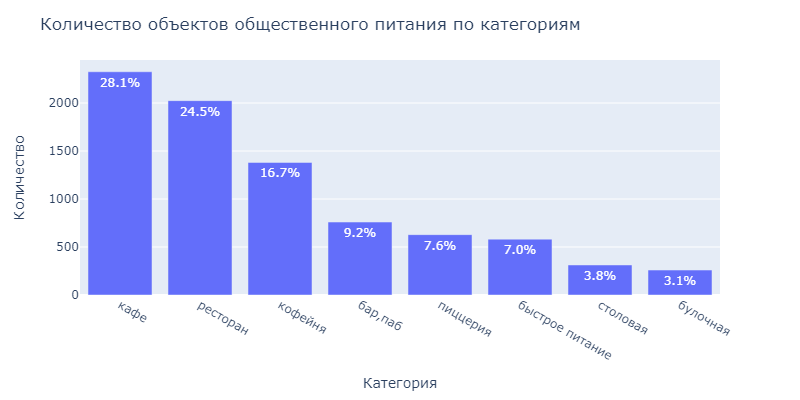

In [47]:
# строим столбчатую диаграмму 
fig_chain_category_new = px.bar(category.sort_values(by='Количество', ascending=False),
                                # загружаем данные и заново их сортируем
             x='Категория', # указываем столбец с данными для оси X
             y='Количество', # указываем столбец с данными для оси Y
             text='Доля')              
# оформляем график
fig_chain_category_new.update_layout(title='Количество объектов общественного питания по категориям',
                   xaxis_title='Категория',
                   yaxis_title='Количество',
                   width=800, height=400)
fig_chain_category_new.show('png') # выводим график

<div style="border:solid green 2px; padding: 20px">

**Количество объектов общественного питания по категориям.**
* Кафе: доля 28.1%
* Ресторан: доля 24.5%
* Кофейня: доля 16.7%
* Бар,паб: доля 9.18%
* Пиццерия 7.6% и Быстрое питание 7.03%
* Столовая 3.78% и Булочная 3.14%

2 категории (**кафе и рестораны**) занимают долю 52.6%. Это виды категорий с наиболее широким ассортиментом.

> В России есть разделение заведений на «кафе» и «рестораны», но нет четких критериев, поэтому заведение может называть себя как угодно.

> Другие предприниматели считают, что разделение все-таки есть. И главное отличие кафе от ресторана — цель посещения. В ресторан гости приходят на несколько часов, чтобы развлечься. В кафе, как правило, приходят пообщаться, перекусить или взять кофе с собой по дороге на работу.

> Как правило, предприниматели, которые хотят, чтобы гости не боялись вывески „Ресторан“, называют заведение „Кафе“.

Информация из статьи [Кафе или ресторан: в чем разница и что лучше открыть?](https://secrets.tinkoff.ru/voprosy-otvety/otlichie-kafe-ot-restorana/)

Третья по доле категория **кофейня** (доля 16.7%). Кофейня - это заведение с более ограниченным ассортиментом. Как правило в меню в основном присутствуют: кофе, чай, выпечка. А также в кофейне меньшее количество сотрудников, чем в кафе и ресторанах.

Четвертая по доле категория **бар,паб** (доля 9.18%). Категория предполагает ограниченную аудиторию по факторам продажи алкогольной продукции и работы в ночное время суток. Также с этими факторами связаны риски для владельцев данной категории.

Самые маленькие доли у категорий **столовая и булочная** (в среднем 3.4%).


</div>

### Количество посадочных мест в местах по категориям

<div style="border:solid black 2px; padding: 20px">

Исследуем количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее.

</div>

In [48]:
# выводим основные статистические данные
data['seats'].describe().round()

count    4777.0
mean      108.0
std       123.0
min         0.0
25%        40.0
50%        75.0
75%       140.0
max      1288.0
Name: seats, dtype: Float64

In [49]:
data.pivot_table(index='category', values='seats',
                 aggfunc={'seats':['count', 'min', 'median', 'mean', 'max']})\
    .sort_values('count', ascending=False)\
    .style.format("{:.0f}").background_gradient(cmap='Blues', axis=0)\
    .set_caption('Посадочные места в заведениях по категориям')

,count,max,mean,median,min
category,,,,,
ресторан,1264,1288,122,86,0
кафе,1217,1288,98,60,0
кофейня,744,1288,111,80,0
"бар,паб",467,1288,124,82,0
пиццерия,426,1288,94,54,0
быстрое питание,346,1040,98,65,0
столовая,163,1200,100,76,0
булочная,150,625,88,50,0


In [50]:
# проверим нулевые значения по категориям заведений
a = round((len(data[data['seats'] == 0]) / len(data[data['seats'] > 0])) * 100, 0)
print('Доля заведений без посадочных мест:', a, '%')

Доля заведений без посадочных мест: 3.0 %


In [51]:
print('Количество посадочных мест больше 300:', len(data[data['seats'] > 300]))
# считаем количество строк по условию

Количество посадочных мест больше 300: 251


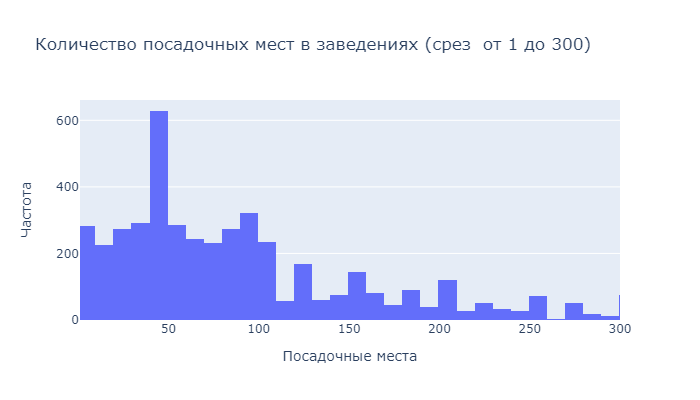

In [52]:
data_seats_nan = data.fillna(np.nan).replace([np.nan], [None])
fig_hist_seats = px.histogram(data_seats_nan, x='seats', range_x=[1, 300],
                              title='Количество посадочных мест в заведениях (срез  от 1 до 300)',
                              width=700, height=400) 
fig_hist_seats.update_xaxes(title_text='Посадочные места')
fig_hist_seats.update_yaxes(title_text='Частота')
fig_hist_seats.show('png')

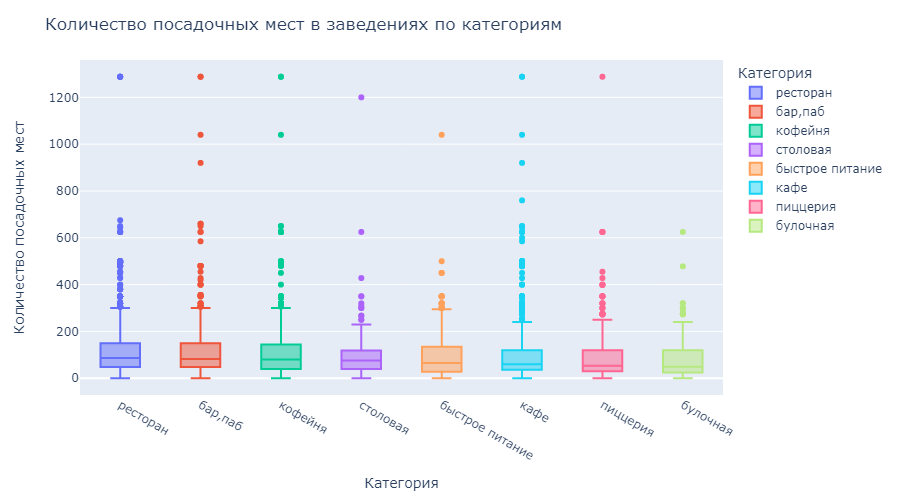

In [53]:
# добавляем столбец с медианой
data['meadian'] = data.groupby('category')['seats'].transform('median')
data_seats_nan_new = data.fillna(np.nan).replace([np.nan], [None]).rename(columns = {'category': 'Категория'})
# строим график "ящик с усами"
fig_seats = px.box(data_seats_nan_new.sort_values(by='meadian', ascending=False),
                   x='Категория', y='seats', color='Категория')
fig_seats.update_layout(title='Количество посадочных мест в заведениях по категориям',
                  yaxis_title='Количество посадочных мест',
                  xaxis_title='Категория', width=900, height=500)
fig_seats.show('png')

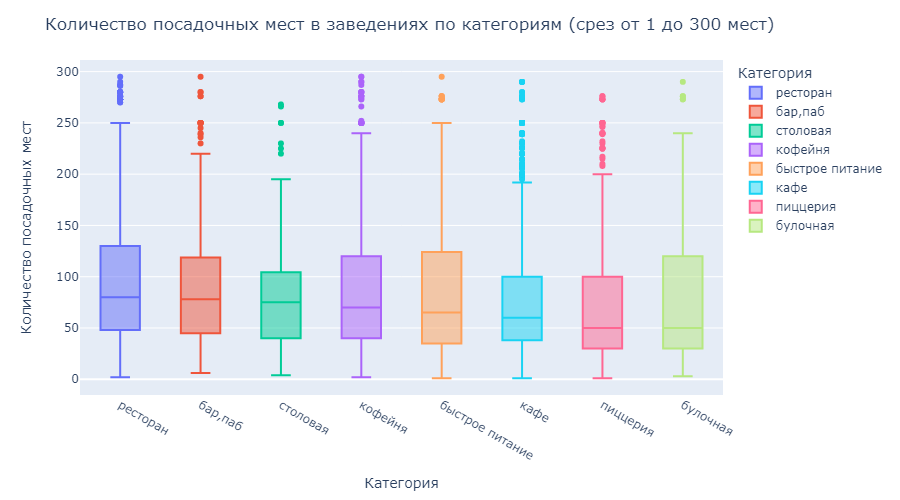

In [54]:
data_seats_nan_300 = data[(data['seats'] > 0) & (data['seats'] < 300)].rename(columns = {'category': 'Категория'})
data_seats_nan_300['meadian'] = data_seats_nan_300.groupby('Категория')['seats'].transform('median')

# строим график "ящик с усами"
fig_seats_nan_300 = px.box(data_seats_nan_300.sort_values(by='meadian', ascending=False),
                           x='Категория', y='seats', color='Категория')
fig_seats_nan_300.update_layout(title='Количество посадочных мест в заведениях по категориям (срез от 1 до 300 мест)',
                  yaxis_title='Количество посадочных мест',
                  xaxis_title='Категория', width=900, height=500)
fig_seats_nan_300.show('png')

<div style="border:solid green 2px; padding: 20px">

**Количество посадочных мест в заведениях по категориям.**

* Среднее количество посадочных мест: 108
* Медиана количества посадочных мест: 75

На гистограмме видим пик количества значений в диапазоне 40-49 посадочных мест. А также видим длинный хвост из больших значений.

У половины заведений есть выбросы больших значений (максимальное значение 1288).

Медиана топовых категорий (по количеству заведений):
* кафе: 60
* ресторан: 86
* кофейня: 80

Третий квартиль (Q3) по категориям находится в диапазоне: 120-150 посадочных мест.

Доля заведений, где посадочных мест '0': 3%.

</div>

### Соотношение сетевых и несетевых заведений

<div style="border:solid black 2px; padding: 20px">

Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете.

</div>

In [55]:
# Группируем данные
data_chain = data.groupby('chain')['name'].agg({'count', 'nunique'})\
                 .rename(columns = {'count': 'Количество', 'nunique': 'Уникальные названия'})\
                 .reset_index()           
data_chain['chain'] = data_chain['chain'].replace({0: 'Несетевые', 1: 'Сетевые'})
data_chain.loc['Итого']= data_chain.sum(numeric_only=True, axis=0)
data_chain = data_chain.fillna('Итого').rename(columns = {'chain': 'Сеть'})
data_chain['Доля уникальных названий от общего количества'] = round(
                                                             (data_chain['Уникальные названия']
                                                              / data_chain['Количество']) * 100, 1)
data_chain

,Сеть,Уникальные названия,Количество,Доля уникальных названий от общего количества
0,Несетевые,4721.0,5116.0,92.3
1,Сетевые,741.0,3160.0,23.4
Итого,Итого,5462.0,8276.0,66.0


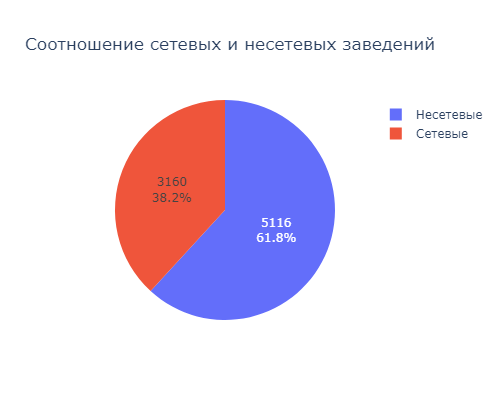

In [56]:
# строим круговую диаграмму
fig_data_chain = px.pie(data_chain[data_chain['Сеть'] != 'Итого'],
                       values='Количество', names='Сеть',
                        title='Соотношение сетевых и несетевых заведений')
fig_data_chain.update_traces(textinfo='value + percent')
fig_data_chain.update_layout(width=500, height=400)
fig_data_chain.show('png')

<div style="border:solid green 2px; padding: 20px">

**Соотношение сетевых и несетевых заведений.**

| Тип      |  Количество  | Доля (%)| 
|:---------|:------------:|:-------:| 
|Несетевые | 5193         | 62.7    | 
|Сетевые   | 3084         | 37.3    | 

По количеству заведений основная доля у несетевых объектов (62.7%).

В несетевых заведениях доля уникальных названий составляет 93.5%.

</div>

### Соотношение сетевых и несетевых заведений в разрезе категорий

<div style="border:solid black 2px; padding: 20px">

Рассмотрим: какие категории заведений чаще являются сетевыми.

</div>

In [57]:
# строим сводную таблицу
data_category = data.pivot_table(index='category', columns='chain', values='name', aggfunc='count')\
                    .reset_index()\
                    .rename(columns = {'category': 'Категория', 0: 'Несетевые', 1: 'Сетевые'})
data_category['Итого'] = data_category[['Несетевые', 'Сетевые']].sum(axis=1)
data_category['Доля сетевых'] = (data_category['Сетевые'] / data_category['Итого']).round(2)
data_category['Доля несетевых'] = (data_category['Несетевые'] / data_category['Итого']).round(2)

data_category = data_category.sort_values(by='Итого', ascending=False)
data_category.style.background_gradient(cmap='Blues', axis=0)\
             .set_caption('Количество объектов общественного питания по категориям')

chain,Категория,Несетевые,Сетевые,Итого,Доля сетевых,Доля несетевых
3,кафе,1550,776,2326,0.330000,0.670000
6,ресторан,1304,721,2025,0.360000,0.640000
4,кофейня,683,698,1381,0.510000,0.490000
0,"бар,паб",594,166,760,0.220000,0.780000
5,пиццерия,302,327,629,0.520000,0.480000
2,быстрое питание,360,222,582,0.380000,0.620000
7,столовая,226,87,313,0.280000,0.720000
1,булочная,97,163,260,0.630000,0.370000


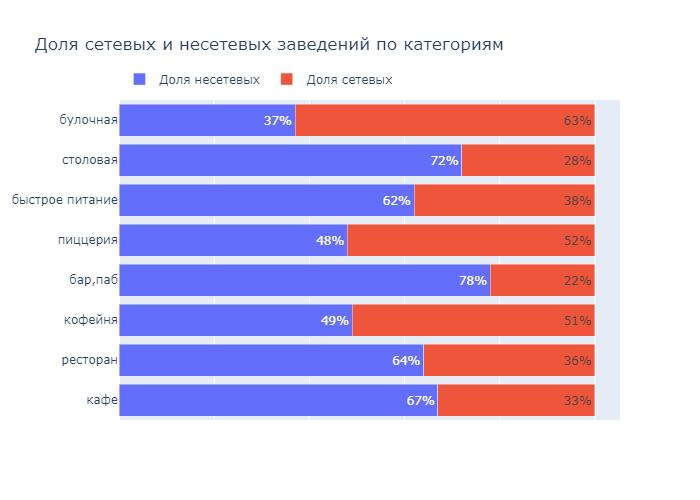

In [58]:
fig_chain_category = px.bar(data_category,
                            y='Категория', x=['Доля несетевых', 'Доля сетевых'], 
                            title='Доля сетевых и несетевых заведений по категориям')

fig_chain_category.update_xaxes(title=None, showticklabels=False)
fig_chain_category.update_yaxes(title=None)

fig_chain_category.update_layout(barmode='stack',
                                 legend=dict(orientation='h', yanchor='bottom', y=1.02,
                                 xanchor='left', x=.001,
                                 title=None))

fig_chain_category.update_traces(texttemplate='%{x:.0%}',
                                 hovertemplate='%{x:.0%} заведений<br>в категории <i>%{y}</i>')

fig_chain_category.show('png')

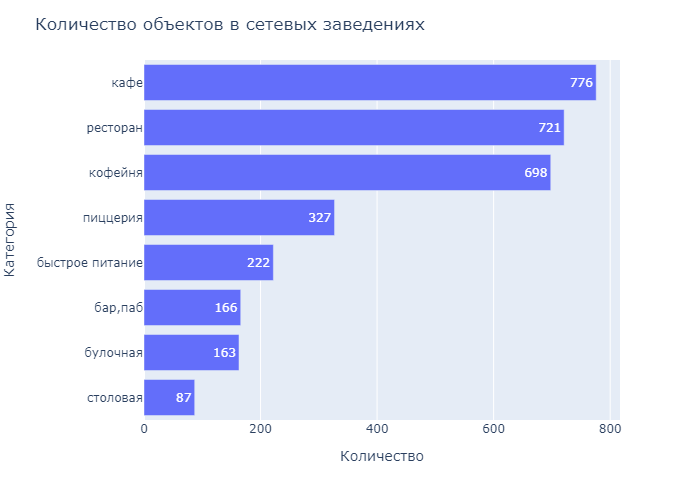

In [59]:
# строим столбчатую диаграмму 
fig_chain_category_2 = px.bar(data_category.sort_values(by='Сетевые', ascending=True),
                              # загружаем данные и заново их сортируем
             x='Сетевые', # указываем столбец с данными для оси X
             y='Категория', # указываем столбец с данными для оси Y
             text='Сетевые') #добавляем аргумент, который отобразит текст с информацией            
# оформляем график
fig_chain_category_2.update_layout(title='Количество объектов в сетевых заведениях',
                   xaxis_title='Количество',
                   yaxis_title='Категория')
fig_chain_category_2.show('png') # выводим график

<div style="border:solid green 2px; padding: 20px">

**Соотношение сетевых и несетевых заведений в разрезе категорий.**

Топ-3 сетевых категории по количеству объектов: 'кафе', 'ресторан', 'кофейня'.

Стоит обратить внимание на то, что в категориях 'кофейня', 'пиццерия' равная доля сетевых и несетевых заведений.

В категории 'бар,паб' значительно преобладают несетевые заведения.

</div>

### Топ-15 популярных сетей в Москве

<div style="border:solid black 2px; padding: 20px">

Сгруппируем данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Определим: к какой категории заведений они относятся.

</div>

In [60]:
# строим сводную таблицу
top_15_name_cat = data[data['chain'] == 1]\
             .pivot_table(index=['name', 'category'], values=['chain', 'rating', 'middle_avg_bill'],
                          aggfunc={'chain':'count', 'rating':'mean', 'middle_avg_bill':'mean'})\
             .sort_values(by='chain', ascending=False).reset_index()\
             .rename(columns = {'name': 'Название заведения', 'chain': 'Количество объектов',
                                'category': 'Категория',
                                'middle_avg_bill': 'Средний чек', 'rating': 'Рейтинг'})\
             .head(15)   
top_15_name_cat.style.format({'Рейтинг':'{:.1f}','Средний чек':'{:.0f}'})\
               .background_gradient(cmap='Blues', axis=0)

,Название заведения,Категория,Количество объектов,Средний чек,Рейтинг
0,шоколадница,кофейня,120,679,4.2
1,домино с пицца,пиццерия,76,504,4.2
2,додо пицца,пиццерия,74,388,4.3
3,яндекс лавка,ресторан,72,nan,3.9
4,one price coffee,кофейня,70,nan,4.1
5,cofix,кофейня,65,nan,4.1
6,prime,ресторан,50,362,4.1
7,кофепорт,кофейня,40,nan,4.2
8,кулинарная лавка братьев караваевых,кафе,38,459,4.4
9,теремок,ресторан,38,326,4.1


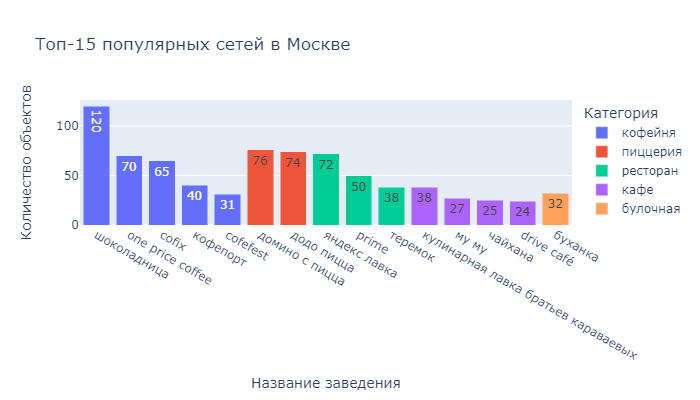

In [61]:
# строим столбчатый график
fig_top_15_name_cat = px.bar(data_frame=top_15_name_cat,
                             x='Название заведения', y='Количество объектов', color='Категория',
                             barmode='stack', height=400,
                             text = 'Количество объектов', title='Топ-15 популярных сетей в Москве')
fig_top_15_name_cat.show('png')

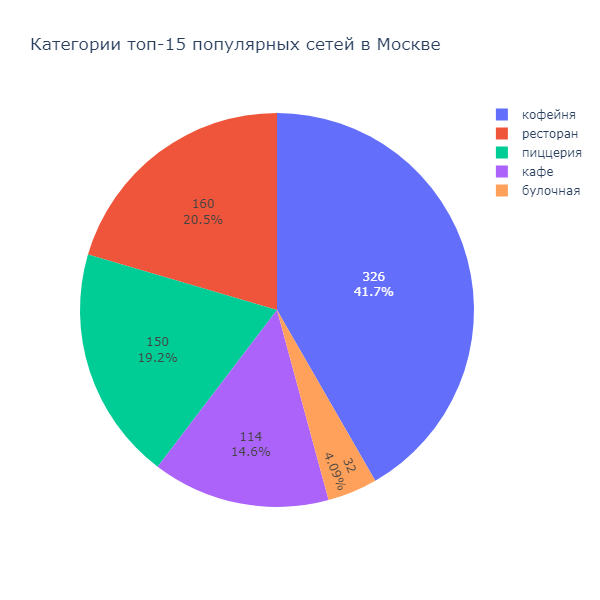

In [62]:
# строим круговую диаграмму
fig_top_15_name = px.pie(top_15_name_cat,
                         values='Количество объектов', names='Категория',
                         title='Категории топ-15 популярных сетей в Москве')
fig_top_15_name.update_traces(textinfo='value + percent')
fig_top_15_name.update_layout(width=600, height=600)
fig_top_15_name.show('png')

<div style="border:solid green 2px; padding: 20px">

**Топ-15 популярных сетей в Москве:**

*Шоколадница, Домино'с Пицца, Додо Пицца, One Price Coffee, Яндекс Лавка, Cofix, Prime, КОФЕПОРТ, Кулинарная лавка братьев Караваевых, Теремок, Буханка, CofeFest, Му-Му, Чайхана, Drive Café*

**Выделим отдельно Топ-5 популярных сетей в Москве.**

| Название заведения | Категория    | Количество объектов | Средний чек | Рейтинг | 
|:-------------------|:-------------|:-------------------:|:-----------:|:-------:|
|Шоколадница         | кофейня      | 120                 | 679         | 4.2     |
|Домино'с Пицца      | пиццерия     | 76                  | 504         | 4.2     |
|Додо Пицца          | пиццерия     | 74                  | 388         | 4.3     |
|One Price Coffee    | кофейня      | 70                  | нет данных  | 4.1     |
|Яндекс Лавка	     | ресторан     | 69                  | нет данных  | 3.9     |


* 5 из 15 топовых сетей относятся к категории 'кофейня' (доля по количеству объектов 41.8% от всех топ-15).

* Стоит отметить категорию 'пиццерия'. В сетевой части бизнеса фактически 2 игрока держат рынок пиццерий ('Домино'с Пицца' и 'Додо Пицца').

* Довольно большой разброс по среднему чеку в данных объектах. Самый высокий средний чек в сети 'Шоколадница'.
  
* В список попала 1 сеть категории булочная 'Буханка'. Если смотреть на ассортимент данной сети, то скорее данную сети можно к категории кофейня. Категория 'булочная', скорее некий маркетинговых ход, чем отражение некой реальной особенности.
  
* Есть видимое несоответствие категории и ассортимента, который представлен в сетях. Например, сеть Шоколадница имеет широкий ассортимент различных блюд и скорее относится к категориям кафе или ресторан, чем кофейня. Или, например, 'Теремок' и 'Prime' сложно отнести к категории ресторан в привычном смысле слова. Можно сделать вывод, что присвоение категории заведениям общественного питания может быть связано не с реальными характеристиками объектов, а с другими факторами как маркетинг, лицензия и другие.


</div>

### Объекты общественного питания по административным районам Москвы

<div style="border:solid black 2px; padding: 20px">

Рассмотрим: какие административные районы Москвы присутствуют в датасете.

Отобразим общее количество заведений и количество заведений каждой категории по районам.

</div>

In [63]:
# строим сводную таблицу
data_district_new = data.pivot_table(index='district_type', values='name', aggfunc='count')\
                    .reset_index().sort_values('name', ascending=False)
data_district_new['Доля'] = round((data_district_new['name'] / data_district_new['name'].sum()) * 100, 1)
data_district_new['Доля'] = data_district_new['Доля'].map('{:,.1f}%'.format)
data_district_new.columns = ['Район Москвы', 'Количество объектов', 'Доля']
data_district_new

,Район Москвы,Количество объектов,Доля
5,ЦАО,2223,26.9%
2,САО,886,10.7%
3,СВАО,878,10.6%
6,ЮАО,875,10.6%
1,ЗАО,838,10.1%
0,ВАО,779,9.4%
8,ЮЗАО,698,8.4%
7,ЮВАО,696,8.4%
4,СЗАО,403,4.9%


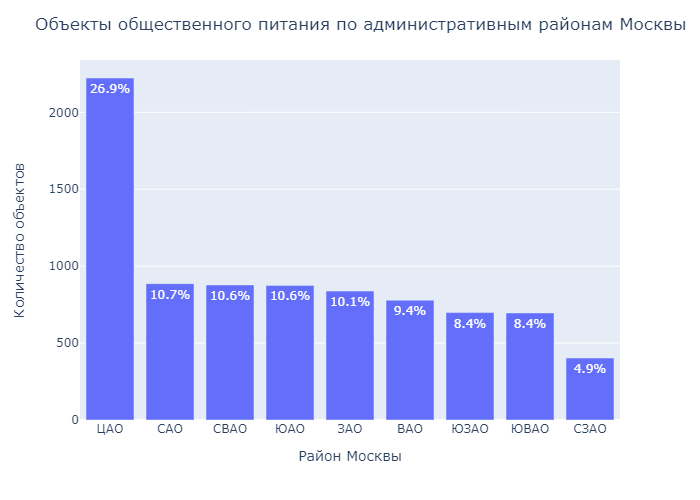

In [64]:
# строим столбчатую диаграмму 
fig_data_district_new = px.bar(data_district_new.sort_values(by='Количество объектов', ascending=False),
                               # загружаем данные и заново их сортируем
             x='Район Москвы', # указываем столбец с данными для оси X
             y='Количество объектов', # указываем столбец с данными для оси Y
             text='Доля')              
# оформляем график
fig_data_district_new.update_layout(title='Объекты общественного питания по административным районам Москвы',
                   xaxis_title='Район Москвы',
                   yaxis_title='Количество объектов',
                   width=700, height=500)
fig_data_district_new.show('png') # выводим график

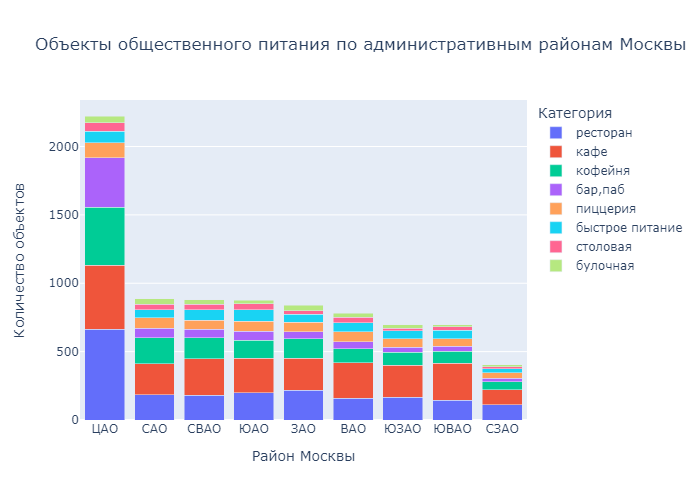

In [65]:
# строим сводную таблицу
data_district = data.pivot_table(index=['district_type', 'category'], values='name', aggfunc='count')\
                    .reset_index().sort_values('name', ascending=False)
data_district.columns = ['Район Москвы', 'Категория', 'Количество объектов']

# строим столбчатую диаграмму
fig_data_district_2 = px.bar(data_frame=data_district, x='Район Москвы', y='Количество объектов',
                           color='Категория', barmode='stack', 
                           title='Объекты общественного питания по административным районам Москвы')
fig_data_district_2.update_layout(width=700, height=500, xaxis={'categoryorder':'total descending'})
fig_data_district_2.show('png')

<div style="border:solid black 2px; padding: 20px">

**Численность населения Москвы в 2022.**
    
[Численность населения Москвы в 2022](https://mbfinance.ru/investitsii/prognozy-i-analitika/naselenie-moskva/)

</div>

In [66]:
# формируем DataFrame
district_count = pd.DataFrame([['ЦАО', 779086, 2223],
                               ['САО', 1175229, 886],
                               ['СВАО', 1427597, 879],
                               ['ЮАО', 1773425, 875],
                               ['ЗАО', 1383853, 838],
                               ['ВАО', 1514420, 779],
                               ['ЮЗАО', 1442971, 698],
                               ['ЮВАО', 1432839, 696],
                               ['СЗАО', 1009217, 403]], 
columns=['район', 'численность_населения', 'заведения_питания'])                              
district_count['доля_населения'] = round((district_count['численность_населения']
                                          / district_count['численность_населения'].sum()) * 100, 1)
district_count['доля_заведений_питания'] = round((district_count['заведения_питания']
                                                  / district_count['заведения_питания'].sum()) * 100, 1)
district_count['соотношение_долей'] = (district_count['доля_заведений_питания']
                                     / district_count['доля_населения'])

district_count.style.format({'доля_населения':'{:.1f}','доля_заведений_питания':'{:.1f}',
                             'разница_долей':'{:.1f}', 'соотношение_долей':'{:.1f}'})\
              .background_gradient(cmap='Blues', axis=0)

,район,численность_населения,заведения_питания,доля_населения,доля_заведений_питания,соотношение_долей
0,ЦАО,779086,2223,6.5,26.9,4.1
1,САО,1175229,886,9.8,10.7,1.1
2,СВАО,1427597,879,12.0,10.6,0.9
3,ЮАО,1773425,875,14.9,10.6,0.7
4,ЗАО,1383853,838,11.6,10.1,0.9
5,ВАО,1514420,779,12.7,9.4,0.7
6,ЮЗАО,1442971,698,12.1,8.4,0.7
7,ЮВАО,1432839,696,12.0,8.4,0.7
8,СЗАО,1009217,403,8.5,4.9,0.6


<div style="border:solid green 2px; padding: 20px">

**Объекты общественного питания по административным районам Москвы.**

В данных представлены 9 административных районов Москвы.

Доля по количеству объектов:
* Основная доля объектов находится в ЦАО (26.9%).
* В остальных районах доля объектов в диапазоне от 8.41% до 10.7%.
* Меньше всего объектов в СЗАО (доля 4.87%).
  
Во всех районах превалируют категории кафе и рестораны.

Категории 'бар,паб' и 'рестораны' в большей степени сосредоточены в ЦАО.

Меньше всего численность населения в ЦАО, при этом самая большая доля по количеству объектов общественного питания. По этому соотношению ЦАО можем определить, как район, где сосредоточена значительная социальная жизнь города (работа, отдых).

В СЗАО меньше всего объектов общественного питания, но и доля численности населения самая маленькая. Если смотреть разницу долей с другими районами (не считая ЦАО), то соотношение долей находится в пределах нормы.

</div>

### Рейтинги объектов общественного питания по категориям

<div style="border:solid black 2px; padding: 20px">

Визуализируем распределение средних рейтингов по категориям заведений.

</div>

In [67]:
# строим сводную таблицу
rating_category = data.pivot_table(index='category', values=['name', 'rating'],
                                   aggfunc={'name': 'count', 'rating': 'mean'})\
                       .reset_index().rename(columns = {'rating': 'Средний рейтинг',
                                                        'category': 'Категория', 'name': 'Количество объектов'})\
                       .sort_values('Средний рейтинг', ascending=False)
rating_category['Средний рейтинг'] = rating_category['Средний рейтинг'].round(1)
rating_category.style.format({'Средний рейтинг':'{:.1f}'})\
               .background_gradient(cmap='Blues', axis=0)

,Категория,Количество объектов,Средний рейтинг
0,"бар,паб",760,4.4
5,пиццерия,629,4.3
6,ресторан,2025,4.3
4,кофейня,1381,4.3
1,булочная,260,4.3
7,столовая,313,4.2
3,кафе,2326,4.1
2,быстрое питание,582,4.0


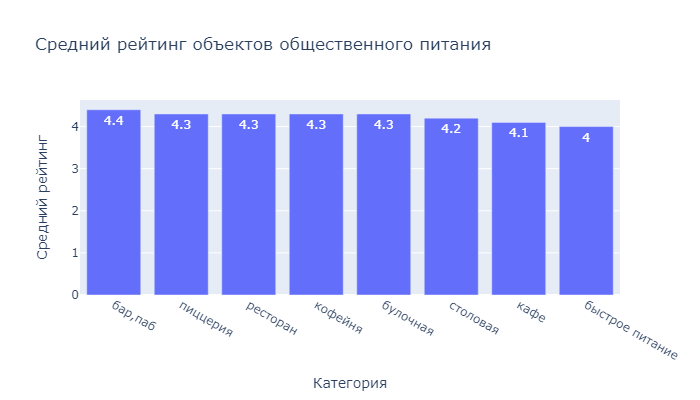

In [68]:
# строим столбчатую диаграмму
fig_rating_category = px.bar(data_frame=rating_category, x='Категория', y='Средний рейтинг',
                             height=400, barmode='stack', text = 'Средний рейтинг',
                             title='Средний рейтинг объектов общественного питания')
fig_rating_category.show('png')

<div style="border:solid green 2px; padding: 20px">

**Рейтинги объектов общественного питания по категориям.**

Рейтинги в разных категориях не сильно различаются и все находятся в одном диапазоне психологического восприятия оценки (от 4 до 4.5).

Самый высокий рейтинг у категорий 'бар,паб' 4.4.

Самый низкий рейтинг у категории 'быстрое питание' 4.


</div>

### Средний рейтинг заведений каждого района

<div style="border:solid black 2px; padding: 20px">

Построим таблицу со средним рейтингом заведений каждого района.


</div>

In [69]:
# Группируем данные по рейтингу
rating_district = data.groupby('district', as_index=False)['rating'].agg('mean')\
                      .sort_values('rating', ascending=False)
rating_district.style.format({'rating':'{:.1f}'})\
               .background_gradient(cmap='Blues', axis=0)

,district,rating
5,Центральный административный округ,4.4
2,Северный административный округ,4.2
4,Северо-Западный административный округ,4.2
0,Восточный административный округ,4.2
1,Западный административный округ,4.2
8,Южный административный округ,4.2
7,Юго-Западный административный округ,4.2
3,Северо-Восточный административный округ,4.2
6,Юго-Восточный административный округ,4.1


<div style="border:solid green 2px; padding: 20px">

**Средний рейтинг заведений по районам.**

У большинства районов средний рейтинг заведений 4.2.

* Самый высокий рейтинг у района ЦАО 4.4.

* Самый низкий рейтинг у района ЮВАО 4.1.

</div>

### Топ-15 улиц по количеству заведений

<div style="border:solid black 2px; padding: 20px">

Найдем топ-15 улиц по количеству заведений.

Построим график распределения количества заведений и их категорий по этим улицам.

</div>

In [70]:
# строим сводную таблицу
top_15_street = data.pivot_table(index='street', values=['name', 'rating', 'middle_avg_bill', 'district'],
                      aggfunc={'name':'count', 'middle_avg_bill':'mean', 'rating':'mean', 'district': 'nunique'})\
                     .sort_values(by='name', ascending=False).reset_index()\
                     .rename(columns = {'name': 'Количество объектов', 'street': 'Улица',
                                         'district': 'Количество районов',
                                         'middle_avg_bill': 'Средний чек', 'rating': 'Рейтинг'})\
                     .head(15)
# добавляем длину улиц, найденную при соответствующих запросах в яндекс поисковике
top_15_street['Длина улицы (км)'] = [9, 14, 8, 16, 5.6, 15.5, 10.5, 22.5, 15.2, 108.9, 8.6, 4.9, 8.3, 16, 1.8]

top_15_street[['Улица', 'Длина улицы (км)', 'Количество объектов',
               'Количество районов', 'Средний чек', 'Рейтинг']]\
.style.format({'Рейтинг':'{:.1f}','Средний чек':'{:.0f}','Длина улицы (км)':'{:.1f}'})\
      .background_gradient(cmap='Blues', axis=0)

,Улица,Длина улицы (км),Количество объектов,Количество районов,Средний чек,Рейтинг
0,проспект Мира,9.0,183,2,886,4.1
1,Профсоюзная улица,14.0,122,1,785,4.2
2,проспект Вернадского,8.0,108,2,977,4.2
3,Ленинский проспект,16.0,107,4,1137,4.2
4,Ленинградский проспект,5.6,95,1,1281,4.3
5,Дмитровское шоссе,15.5,88,2,1104,4.2
6,Каширское шоссе,10.5,77,1,1793,4.1
7,Варшавское шоссе,22.5,75,1,760,4.2
8,Ленинградское шоссе,15.2,68,1,1093,4.2
9,МКАД,108.9,60,8,607,4.1


In [71]:
# строим сводную таблицу только по топ-15 улицам
list_street_top = top_15_street['Улица'].unique()

top_15_street_category = data[data['street'].isin(list_street_top)]\
                                            .pivot_table(index=['street', 'category'], values='name', aggfunc='count')\
                                            .reset_index()\
                                            .rename(columns={'name':'Количество объектов',
                                                             'street':'Улица', 'category':'Категория'})\
                                            .sort_values(by='Количество объектов', ascending=False)
top_15_street_category.head()

,Улица,Категория,Количество объектов
93,проспект Мира,кафе,53
96,проспект Мира,ресторан,46
63,МКАД,кафе,41
94,проспект Мира,кофейня,36
70,Профсоюзная улица,кафе,35


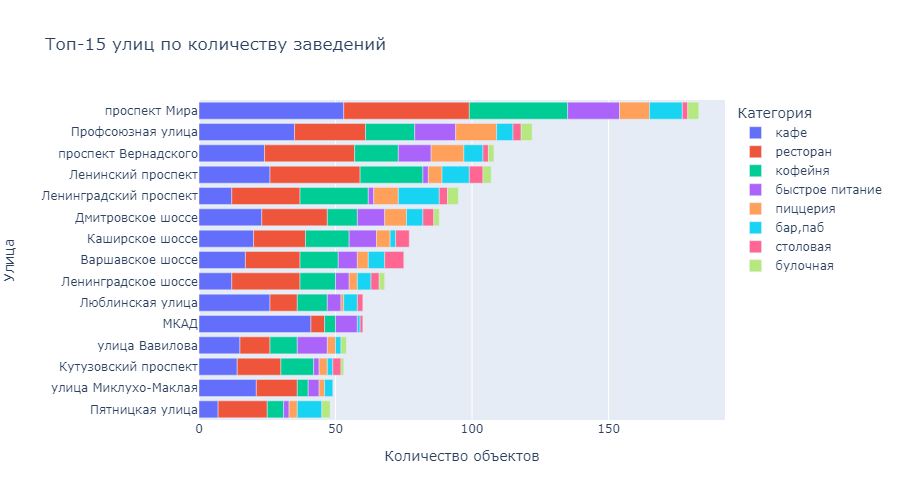

In [72]:
# строим столбчатую диаграмму горизонтальную
fig_top_15_street_category = px.bar(data_frame=top_15_street_category, x='Количество объектов', y='Улица',
                           color='Категория', orientation='h',  
                           title='Топ-15 улиц по количеству заведений')
fig_top_15_street_category.update_layout(width=900, height=500, yaxis={'categoryorder':'total ascending'})
fig_top_15_street_category.show('png')

<div style="border:solid green 2px; padding: 20px">

**Топ-15 улиц по количеству заведений.**

*проспект Мира, Профсоюзная улица, проспект Вернадского, Ленинский проспект, Ленинградский проспект, Дмитровское шоссе, Каширское шоссе, Варшавское шоссе, Ленинградское шоссе, МКАД, Люблинская улица, улица Вавилова, Кутузовский проспект, улица Миклухо-Маклая, Пятницкая улица*

Улицы с количеством объектов больше 100:
* проспект Мира: 183 объекта
* Профсоюзная улица: 122 объекта
* проспект Вернадского: 108 объекта
* Ленинский проспект: 107 объекта

Исключительная особенность улиц в данном списке это то, что все они очень длинные. Исключение Пятницкая улица протяженностью 1.8км.

Также стоит отметить, что больше половины улиц из данного списка относятся к нескольким административным районам.

Средний чек значительно различается в разрезе улиц. Самый высокий средний чек у улиц Каширское шоссе и Кутузовский проспект. Самый низкий средний чек у улиц Люблинская улица и МКАД. Это связано с аудиторией улиц. Например, покупки на МКАД вероятно включают напитки и выпечку или недорогие бизнес-ланчи, что априори не может сделать высокий чек относительно ресторанов на Кутузовском проспекте.

Важно отметить высокий рейтинг объектов на Пятницкой улице.

</div>

### Улицы, на которых находится только один объект общепита

<div style="border:solid black 2px; padding: 20px">

Найдем улицы, на которых находится только один объект общепита.

</div>

In [73]:
# формируем список улиц с одним объектом
data_street_1_name = data.pivot_table(index='street', values='name', aggfunc='count')
data_street_1_name = data_street_1_name.query('name == 1').reset_index()
print('Проверка минимальное значение:', data_street_1_name['name'].min())
print('Проверка максимальное значение:', data_street_1_name['name'].min())
list_street_1_name = data_street_1_name['street'].unique()
print('Количество улиц с 1 объектом:', len(list_street_1_name))
print('Количество улиц с 1 объектом (доля от всех объектов):',
      round((len(list_street_1_name)/ len(data)) * 100, 1))

Проверка минимальное значение: 1
Проверка максимальное значение: 1
Количество улиц с 1 объектом: 427
Количество улиц с 1 объектом (доля от всех объектов): 5.2


In [74]:
# срез только по улицам, где 1 объект
data_street_1 = data[data['street'].isin(list_street_1_name)]

# основные статистические данные по всей таблице
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,8276.0,55.750209,0.069528,55.573942,55.70541,55.753736,55.795036,55.928943
lng,8276.0,37.608344,0.098343,37.355651,37.538771,37.605043,37.664361,37.874466
rating,8276.0,4.230945,0.468207,1.0,4.1,4.3,4.4,5.0
middle_avg_bill,3129.0,960.645254,1012.202513,0.0,375.0,750.0,1250.0,35000.0
middle_coffee_cup,533.0,174.795497,89.105166,60.0,124.0,169.0,225.0,1568.0
chain,8276.0,0.381827,0.485864,0.0,0.0,0.0,1.0,1.0
seats,4777.0,108.442537,122.99281,0.0,40.0,75.0,140.0,1288.0
meadian,8276.0,71.852284,12.42001,49.5,60.0,80.0,82.0,86.0


In [75]:
# основные статистические данные улиц с 1 объектом
data_street_1.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,427.0,55.760758,0.061433,55.57883,55.733058,55.762188,55.795749,55.914074
lng,427.0,37.614717,0.093991,37.387459,37.560412,37.611739,37.664681,37.867004
rating,427.0,4.238642,0.454896,1.0,4.1,4.3,4.5,5.0
middle_avg_bill,161.0,966.006211,1009.660806,67.0,325.0,650.0,1250.0,7000.0
middle_coffee_cup,24.0,186.166667,55.544472,95.0,140.0,177.5,213.75,320.0
chain,427.0,0.28103,0.45003,0.0,0.0,0.0,1.0,1.0
seats,159.0,59.748428,49.21523,0.0,30.0,45.0,80.0,240.0
meadian,427.0,72.13466,11.58349,49.5,60.0,76.0,82.0,86.0


In [76]:
data_street_1_n = data_street_1.pivot_table(index='category', values='name', aggfunc='count')\
                               .sort_values('name', ascending=False).reset_index()

data_street_1_n['Доля'] = round((data_street_1_n['name'] / data_street_1_n['name'].sum()) * 100, 1)
data_street_1_n['Доля'] = data_street_1_n['Доля'].map('{:,.1f}%'.format)
data_street_1_n.columns = ['Категория', 'Количество объектов', 'Доля']
data_street_1_n

,Категория,Количество объектов,Доля
0,кафе,147,34.4%
1,ресторан,89,20.8%
2,кофейня,76,17.8%
3,"бар,паб",38,8.9%
4,столовая,36,8.4%
5,быстрое питание,20,4.7%
6,пиццерия,14,3.3%
7,булочная,7,1.6%


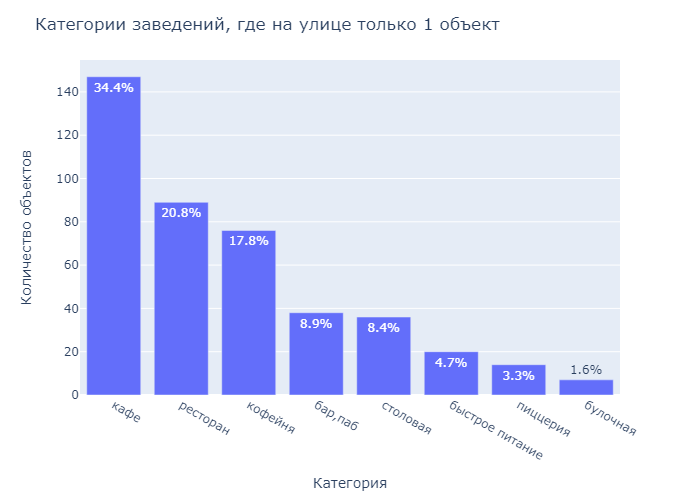

In [77]:
# строим столбчатую диаграмму 
fig_data_street_1_n= px.bar(data_street_1_n.sort_values(by='Количество объектов', ascending=False), # загружаем данные и заново их сортируем
             x='Категория', # указываем столбец с данными для оси X
             y='Количество объектов', # указываем столбец с данными для оси Y
             text='Доля')              
# оформляем график
fig_data_street_1_n.update_layout(title='Категории заведений, где на улице только 1 объект',
                   xaxis_title='Категория',
                   yaxis_title='Количество объектов')
fig_data_street_1_n.show('png') # выводим график

<div style="border:solid green 2px; padding: 20px">

**Улицы, на которых находится только один объект общепита.**

В таблице 426 объектов общепита, где на улице находится только один объект.

Основную долю в данных объектах занимает категория 'кафе'.

Медианные значения основных показателей:
* Средний чек у данных объектов ниже чем у всех объектов (650р. к 750р.).
* Посадочных мест меньше чем у всех объектов (45 к 75).

Сетевых заведений среди данных объектов также меньше чем у всех объектов (доля сетевых 26.8% к 37.3%).

</div>

### Средний чек заведений каждого района

<div style="border:solid black 2px; padding: 20px">

Отобразим средний чек заведений каждого района.

Возьмем медианное значение среднего чека, чтобы исключить влияние выбросов.

</div>

In [78]:
# Группируем данные по району и среднему чеку
data_middle_avg_bill = data.groupby('district', as_index=False)['middle_avg_bill'].agg('median')\
                           .sort_values('middle_avg_bill', ascending=False)
data_middle_avg_bill['middle_avg_bill_total'] = data['middle_avg_bill'].median()
data_middle_avg_bill['difference'] = (data_middle_avg_bill['middle_avg_bill']
                                      / data_middle_avg_bill['middle_avg_bill_total'] - 1) * 100
data_middle_avg_bill.columns = ['Район', 'Средний чек', 'Общий средний чек', 'Разница']
data_middle_avg_bill.style.format({'Средний чек':'{:.0f}', 'Общий средний чек':'{:.0f}', 'Разница':'{:.0f}'})\
                    .background_gradient(cmap='Blues', axis=0)

,Район,Средний чек,Общий средний чек,Разница
1,Западный административный округ,1000,750,33
5,Центральный административный округ,1000,750,33
4,Северо-Западный административный округ,700,750,-7
2,Северный административный округ,650,750,-13
7,Юго-Западный административный округ,650,750,-13
0,Восточный административный округ,575,750,-23
3,Северо-Восточный административный округ,500,750,-33
8,Южный административный округ,500,750,-33
6,Юго-Восточный административный округ,450,750,-40


<div style="border:solid green 2px; padding: 20px">

**Средний чек заведений по районам.**

Самый высокий средний чек в районах ЦАО и ЗАО (1000р.). Больше общего среднего чека на 33%.

Самый низкий средний чек в ЮВАО (450р.). Меньше общего среднего чека на 40%. Также мы ранее выявили, что в данном районе самый низкий рейтинг заведений 4.1.

Как мы видим, на средний чек скорее влияет не удаленность от центра, а престижность района.

</div>

### Диапазоны рейтингов заведений

<div style="border:solid black 2px; padding: 20px">

Рассмотрим, какие рейтинги имеют большинство объектов.

</div>

In [79]:
# Группируем данные по рейтингу
rating_total = data.groupby('rating_type', as_index=False)['name'].agg('count')\
                   .sort_values('name', ascending=False)\
                   .rename(columns = {'name': 'Количество объектов', 'rating_type': 'Рейтинг'})
rating_total

,Рейтинг,Количество объектов
2,4-4.5,5745
3,4.6-5,1396
1,3-3.9,931
0,0-2.9,204


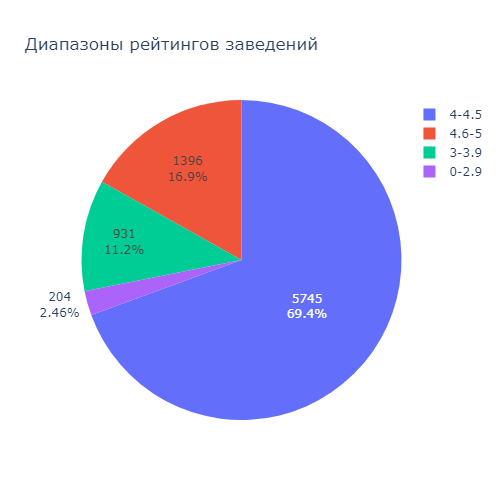

In [80]:
# строим круговую диаграмму
fig_rating_total = px.pie(rating_total, values='Количество объектов',
                           names='Рейтинг', title='Диапазоны рейтингов заведений')
fig_rating_total.update_traces(textinfo='value + percent')
fig_rating_total.update_layout(width=500, height=500)
fig_rating_total.show('png')

<div style="border:solid green 2px; padding: 20px">

**Рейтинги.**

Основная доля рейтингов (69.4%) заведений находится в диапазоне 4-4.5.

Очень маленькая доля рейтингов с оценкой меньше 3 (2.5%).

</div>

### Особенности заведений с плохим рейтингом

<div style="border:solid black 2px; padding: 20px">

Исследуем особенности заведений с плохим рейтингом.

</div>

In [81]:
# выведем доли рейтингов по категориям
rating_type_category = data.groupby(['category','rating_type'])['name'].count()\
                           .reset_index().sort_values('name', ascending=False)\
                           .rename(columns={'name':'Количество объектов','rating_type':'Рейтинг','category':'Категория'})
rating_type_category['Доля'] = round((rating_type_category['Количество объектов']
                             /rating_type_category.groupby('Категория')['Количество объектов'].transform('sum'))*100,1)
rating_type_category.head()

,Категория,Рейтинг,Количество объектов,Доля
26,ресторан,4-4.5,1480,73.1
14,кафе,4-4.5,1469,63.2
18,кофейня,4-4.5,1015,73.5
2,"бар,паб",4-4.5,506,66.6
22,пиццерия,4-4.5,496,78.9


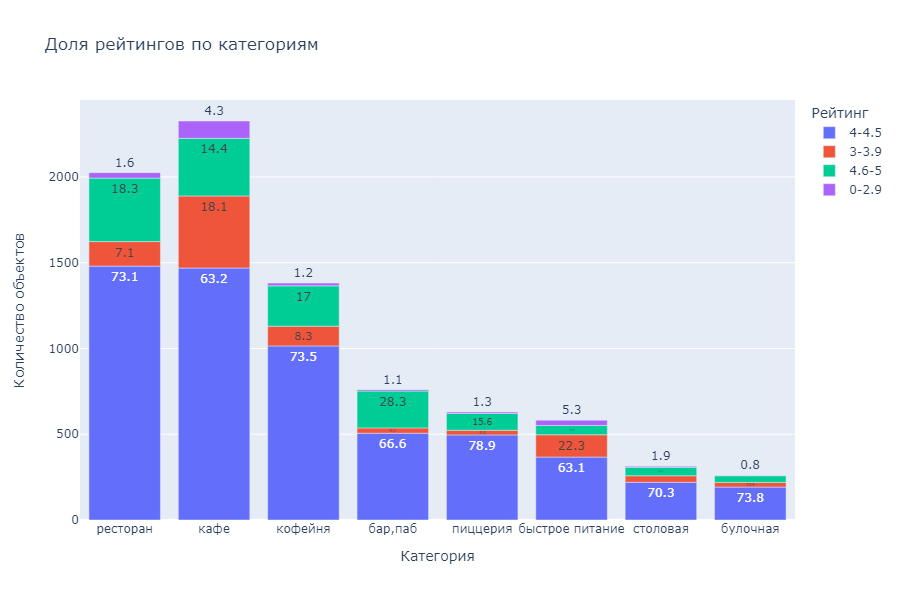

In [82]:
# строим столбчатую диаграмму
fig_data_rating_low = px.bar(data_frame=rating_type_category, x='Категория', y='Количество объектов',
                           color='Рейтинг',  text = 'Доля', 
                           title='Доля рейтингов по категориям')
fig_data_rating_low.update_layout(width=900, height=600, yaxis={'categoryorder':'total ascending'})
fig_data_rating_low.show('png')

In [83]:
# строим сводную таблицу
rating_low = data.pivot_table(index='rating_type', values=['name', 'middle_avg_bill'],
                              aggfunc={'name': 'count', 'middle_avg_bill': 'median'})\
                 .reset_index()\
                 .rename(columns={'rating_type':'Рейтинг','middle_avg_bill':'Средний чек','name':'Количество объектов'})\
                 .sort_values('Количество объектов', ascending=False)
rating_low['Средний чек'] = rating_low['Средний чек'].round(0)
rating_low.style.format({'Средний чек':'{:.0f}'})\
          .background_gradient(cmap='Blues', axis=0)

,Рейтинг,Средний чек,Количество объектов
2,4-4.5,700,5745
3,4.6-5,1050,1396
1,3-3.9,375,931
0,0-2.9,460,204


In [84]:
data_middle_avg_bill_nan = data[data['middle_avg_bill'] > 0]

data_middle_avg_bill_99 = data_middle_avg_bill_nan[data_middle_avg_bill_nan['middle_avg_bill']
                               < np.percentile(data_middle_avg_bill_nan['middle_avg_bill'], 99)]

data_middle_avg_bill_99['middle_avg_bill'].describe().round()

count    3091.0
mean      902.0
std       656.0
min        30.0
25%       375.0
50%       700.0
75%      1250.0
max      3500.0
Name: middle_avg_bill, dtype: float64

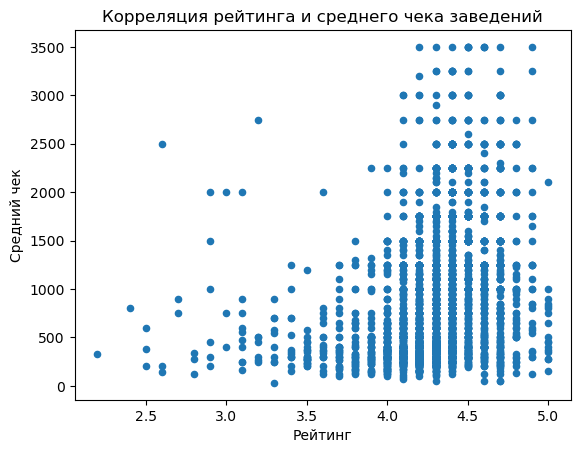

In [85]:
data_middle_avg_bill_99[data_middle_avg_bill_99['rating'] > 2].plot(x='rating', y='middle_avg_bill', kind='scatter')
plt.title('Корреляция рейтинга и среднего чека заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Средний чек')
plt.show('png')

<div style="border:solid green 2px; padding: 20px">

**Особенности заведений с плохим рейтингом.**

Самая большая доля рейтинга с оценкой меньше 4 в категориях кафе и быстрое питание.

Медианное значение среднего чека значительно ниже в заведениях с низким рейтингом.

</div>

### Зависимость часов работы от категории заведения и района

<div style="border:solid black 2px; padding: 20px">

Рассмотрим зависимость часов работы от категории заведения.

</div>

In [86]:
# строим сводную таблицу
data_is_24_7 = data.pivot_table(index='category', columns='is_24_7', values='name', aggfunc='count')\
                   .reset_index()\
                   .rename(columns={'category':'Категория', 0:'Другой режим работы', 1:'Ежедневно, круглосуточно'})
data_is_24_7['Итого'] = data_is_24_7[['Другой режим работы', 'Ежедневно, круглосуточно']].sum(axis=1)
data_is_24_7 = data_is_24_7.sort_values(by='Итого', ascending=False)
data_is_24_7.style.background_gradient(cmap='Blues', axis=0)\
             .set_caption('Количество объектов общественного питания по часам работы')

is_24_7,Категория,Другой режим работы,"Ежедневно, круглосуточно",Итого
3,кафе,1704,265,1969
6,ресторан,1817,134,1951
4,кофейня,1308,58,1366
0,"бар,паб",691,52,743
5,пиццерия,594,31,625
2,быстрое питание,401,150,551
7,столовая,293,11,304
1,булочная,229,24,253


In [87]:
# строим сводную таблицу
data_is_24_7_district = data[data['is_24_7'] == True]\
                                 .pivot_table(index='district', values='name', aggfunc='count').reset_index()\
                                 .rename(columns={'district':'Район','name':'Ежедневно, круглосуточно (количество объектов)'})
data_is_24_7_district.sort_values('Ежедневно, круглосуточно (количество объектов)', ascending=False)

,Район,"Ежедневно, круглосуточно (количество объектов)"
5,Центральный административный округ,131
0,Восточный административный округ,97
6,Юго-Восточный административный округ,92
3,Северо-Восточный административный округ,75
8,Южный административный округ,75
1,Западный административный округ,72
2,Северный административный округ,70
7,Юго-Западный административный округ,70
4,Северо-Западный административный округ,43


<div style="border:solid green 2px; padding: 20px">

**Зависимость часов работы от категории заведения и района.**

Заведения, которые работают ежедневно и круглосуточно в основном имеют категорию кафе и расположены в ЦАО.

Меньше всего объектов, которые работают ежедневно и круглосуточно, в СЗАО, но в этом районе в целом меньше всего заведений.

</div>

### Категории цен по районам

<div style="border:solid black 2px; padding: 20px">

Рассмотрим соотношение категорий цен по районам.

</div>

In [88]:
# выведем доли price по районам
district_type_price = data[data['price'] != 'Нет информации']\
                           .groupby(['district_type','price'])['name'].count()\
                           .reset_index().sort_values('name', ascending=False)\
                           .rename(columns={'name':'Количество объектов','district_type':'Район','price':'Категория цен'})
district_type_price['Доля'] = round((district_type_price['Количество объектов']
                             /district_type_price.groupby('Район')['Количество объектов'].transform('sum'))*100,1)
district_type_price.head()

,Район,Категория цен,Количество объектов,Доля
23,ЦАО,средние,661,54.8
20,ЦАО,высокие,271,22.5
21,ЦАО,выше среднего,240,19.9
15,СВАО,средние,228,74.0
11,САО,средние,226,66.3


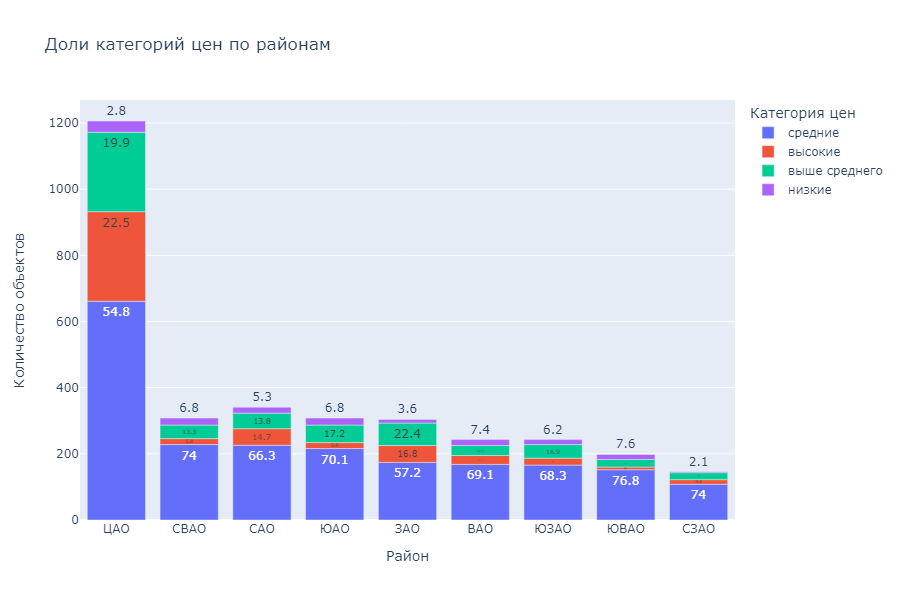

In [89]:
# строим столбчатую диаграмму
fig_district_type_price = px.bar(data_frame=district_type_price, x='Район', y='Количество объектов',
                           color='Категория цен',  text = 'Доля', 
                           title='Доли категорий цен по районам')
fig_district_type_price.update_layout(width=900, height=600, yaxis={'categoryorder':'total ascending'})
fig_district_type_price.show('png')

<div style="border:solid green 2px; padding: 20px">

**Категории цен по районам.**

Во всех районах большинство заведений имеют категорию цен 'средние'.

В ЦАО большая доля категории цен 'высокие' относительно остальных районов.

В ВАО большая доля категории цен 'низкие' относительно остальных районов.

</div>

### Вывод

<div style="border:solid blue 2px; padding: 20px">

**Выводы по исследовательскому анализу данных.**

**Количество объектов общественного питания по категориям.**

* 2 категории (**кафе и рестораны**) занимают долю 52.6%. Это виды категорий с наиболее широким ассортиментом.
* Третья по доле категория **кофейня** (доля 16.7%). Кофейня - это заведение с более ограниченным ассортиментом. Как правило в меню в основном присутствуют: кофе, чай, выпечка. А также в кофейне меньшее количество сотрудников, чем в кафе и ресторанах.
* Четвертая по доле категория **бар,паб** (доля 9.18%). Категория предполагает ограниченную аудиторию по факторам продажи алкогольной продукции и работы в ночное время суток. Также с этими факторами связаны риски для владельцев данной категории.
* **Пиццерия** доля 7.6% и **быстрое питание** доля 7.03%.
* Самые маленькие доли у категорий **столовая и булочная** (в среднем 3.4%).

---

**Количество посадочных мест в заведениях по категориям.**

* Среднее количество посадочных мест: 108
* Медиана количества посадочных мест: 75
* Третий квартиль (Q3) по категориям находится в диапазоне: 120-150 посадочных мест.

На гистограмме видим пик количества значений в диапазоне 40-49 посадочных мест. А также видим длинный хвост из больших значений.

Медиана топовых категорий (по количеству заведений):
* кафе: 60
* ресторан: 86
* кофейня: 80

Доля заведений, где посадочных мест '0' маленькая: 3%.

---

**Соотношение сетевых и несетевых заведений.**

| Тип      |  Количество  | Доля (%)| 
|:---------|:------------:|:-------:| 
|Несетевые | 5193         | 62.7    | 
|Сетевые   | 3084         | 37.3    | 

По количеству заведений основная доля у несетевых объектов (62.7%).

---

**Соотношение сетевых и несетевых заведений в разрезе категорий.**

Топ-3 сетевых категории по количеству объектов: 'кафе', 'ресторан', 'кофейня'.

Стоит обратить внимание на то, что в категориях 'кофейня', 'пиццерия' равная доля сетевых и несетевых заведений.

В категории 'бар,паб' значительно преобладают несетевые заведения.

---

**Топ-15 популярных сетей в Москве:**

*Шоколадница, Домино'с Пицца, Додо Пицца, One Price Coffee, Яндекс Лавка, Cofix, Prime, КОФЕПОРТ, Кулинарная лавка братьев Караваевых, Теремок, Буханка, CofeFest, Му-Му, Чайхана, Drive Café*

* 5 из 15 топовых сетей относятся к категории 'кофейня' (доля по количеству объектов 41.8% от всех топ-15).

* Стоит отметить категорию 'пиццерия'. В сетевой части бизнеса фактически 2 игрока держат рынок пиццерий ('Домино'с Пицца' и 'Додо Пицца').

* Довольно большой разброс по среднему чеку в данных объектах. Самый высокий средний чек в сети 'Шоколадница'.
  
* В список попала 1 сеть категории булочная 'Буханка'. Если смотреть на ассортимент данной сети, то скорее данную сети можно к категории кофейня. Категория 'булочная', скорее некий маркетинговых ход, чем отражение некой реальной особенности.
  
* Есть видимое несоответствие категории и ассортимента, который представлен в сети. Например, сеть Шоколадница имеет широкий ассортимент различных блюд и скорее относится к категориям кафе или ресторан, чем кофейня. Или, например, 'Теремок' и 'Prime' сложно отнести к категории ресторан в привычном смысле слова. Можно сделать вывод, что присвоение категории заведениям общественного питания может быть связано не с реальными характеристиками объектов, а с другими факторами как маркетинг, лицензия и другие.

---

**Объекты общественного питания по административным районам Москвы.**

В данных представлены 9 административных районов Москвы.

Доля по количеству объектов:
* Основная доля объектов находится в ЦАО (26.9%).
* В остальных районах доля объектов в диапазоне от 8.41% до 10.7%.
* Меньше всего объектов в СЗАО (доля 4.87%).
  
Во всех районах превалируют категории кафе и рестораны.

Категории 'бар,паб' и 'рестораны' в большей степени сосредоточены в ЦАО.

Меньше всего численность населения в ЦАО, при этом самая большая доля по количеству объектов общественного питания. По этому соотношению ЦАО можем определить, как район, где сосредоточена значительная социальная жизнь города (работа, отдых).

В СЗАО меньше всего объектов общественного питания, но и доля численности населения самая маленькая. Если смотреть разницу долей с другими районами (не считая ЦАО), то соотношение долей находится в пределах нормы.

Большинство заведений находятся в центральной части Москвы.

---

**Рейтинги объектов общественного питания по категориям.**

Рейтинги в разных категориях не сильно различаются и все находятся в одном диапазоне психологического восприятия оценки (от 4 до 4.5).

Самый высокий рейтинг у категорий 'бар,паб' 4.4. Самый низкий рейтинг у категории 'быстрое питание' 4.

---

**Средний рейтинг заведений по районам.**

У большинства районов средний рейтинг заведений 4.2.

Самый высокий рейтинг у района ЦАО 4.4. Самый низкий рейтинг у района ЮВАО 4.1.

Основная доля рейтингов заведений (69.4%) находится в диапазоне 4-4.5.

Очень маленькая доля рейтингов с оценкой меньше 3 (2.5%).

---

**Топ-15 улиц по количеству заведений.**

*проспект Мира, Профсоюзная улица, проспект Вернадского, Ленинский проспект, Ленинградский проспект, Дмитровское шоссе, Каширское шоссе, Варшавское шоссе, Ленинградское шоссе, МКАД, Люблинская улица, улица Вавилова, Кутузовский проспект, улица Миклухо-Маклая, Пятницкая улица*

Исключительная особенность улиц в данном списке это то, что все они очень длинные. Исключение Пятницкая улица протяженностью 1.8км.

Также стоит отметить, что больше половины улиц из данного списка относятся к нескольким административным районам.

Средний чек значительно различается в разрезе улиц. Самый высокий средний чек у улиц Каширское шоссе и Кутузовский проспект. Самый низкий средний чек у улиц Люблинская улица и МКАД. Это связано с аудиторией улиц. Например, покупки на МКАД вероятно включают напитки и выпечку или недорогие бизнес-ланчи, что априори не может сделать высокий чек относительно ресторанов на Кутузовском проспекте.

Важно отметить высокий рейтинг объектов на Пятницкой улице.

---

**Улицы, на которых находится только один объект общепита.**

В таблице 426 объектов общепита, где на улице находится только один объект.

Основную долю в данных объектах занимает категория 'кафе'.

Медианные значения основных показателей:
* Средний чек у данных объектов ниже чем у всех объектов (650р. к 750р.).
* Посадочных мест меньше чем у всех объектов (45 к 75).

Сетевых заведений среди данных объектов также меньше чем у всех объектов (доля сетевых 26.8% к 37.3%).

---

**Средний чек заведений по районам.**

Самый высокий средний чек в районах ЦАО и ЗАО (1000р.). Больше общего среднего чека на 33%.

Самый низкий средний чек в ЮВАО (450р.). Меньше общего среднего чека на 40%. Также мы ранее выявили, что в данном районе самый низкий рейтинг заведений 4.1.

Как мы видим, на средний чек скорее влияет не удаленность от центра, а престижность района.

---

**Особенности заведений с плохим рейтингом.**

Самая большая доля рейтинга с оценкой меньше 4 в категориях кафе и быстрое питание.

Медианное значение среднего чека значительно ниже в заведениях с низким рейтингом.

---

**Зависимость часов работы от категории заведения и района.**

Заведения, которые работают ежедневно и круглосуточно в основном имеют категорию кафе и расположены в ЦАО.

Меньше всего объектов, которые работают ежедневно и круглосуточно, в СЗАО, но в этом районе в целом меньше всего заведений.

---

**Категории цен по районам.**

Во всех районах большинство заведений имеют категорию цен 'средние'.

В ЦАО большая доля категории цен 'высокие' относительно остальных районов.

В ВАО большая доля категории цен 'низкие' относительно остальных районов.

</div>

[Начало_проекта](#Начало)

<a id="детализация"></a>

## Детализация исследования: открытие кофейни

<div style="border:solid black 2px; padding: 20px">

Основатели фонда «Shut Up and Take My Money» решили открыть кофейню принимая во внимание факт большой конкуренции в данной категории.

Ниже рассмотрим основные параметры кофеен в Москве.

</div>

### Количество заведений 'кофейня' по районам

<div style="border:solid black 2px; padding: 20px">

Рассмотрим:
* Сколько всего кофеен в датасете.
* В каких районах их больше всего и каковы особенности их расположения.

</div>

In [90]:
print('Всего кофеен в датасете:', len(data.query('category == "кофейня"')))

Всего кофеен в датасете: 1381


In [91]:
# Строим сводную таблицу
coffee_district = data.pivot_table(index='district_type', columns='category', values='name', aggfunc='count')\
                      .reset_index().rename(columns = {'district_type': 'Район'})\
                      .sort_values('кофейня', ascending=False)
coffee_district['Итого объектов'] = coffee_district.sum(numeric_only=True, axis=1)
coffee_district['Другие категории'] = (coffee_district['бар,паб']+ coffee_district['булочная']
                                       + coffee_district['быстрое питание']
                                       +coffee_district['кафе']+coffee_district['пиццерия']
                                       +coffee_district['ресторан'] +coffee_district['столовая'])
coffee_district['Доля кофеен'] = round((coffee_district['кофейня'] / coffee_district['Итого объектов']) * 100, 0)
coffee_district['Доля другие категории'] = round((coffee_district['Другие категории']
                                                  / coffee_district['Итого объектов']) * 100, 0)
coffee_district = coffee_district.rename(columns = {'кофейня': 'Кофейня'})

coffee_district[['Район','Итого объектов','Кофейня','Доля кофеен','Доля другие категории']]\
.style.format({'Доля кофеен':'{:.0f}', 'Доля другие категории':'{:.0f}'})\
.background_gradient(cmap='Blues', axis=0)

category,Район,Итого объектов,Кофейня,Доля кофеен,Доля другие категории
5,ЦАО,2223,425,19,81
2,САО,886,190,21,79
3,СВАО,878,152,17,83
1,ЗАО,838,144,17,83
6,ЮАО,875,129,15,85
0,ВАО,779,102,13,87
8,ЮЗАО,698,94,13,87
7,ЮВАО,696,85,12,88
4,СЗАО,403,60,15,85


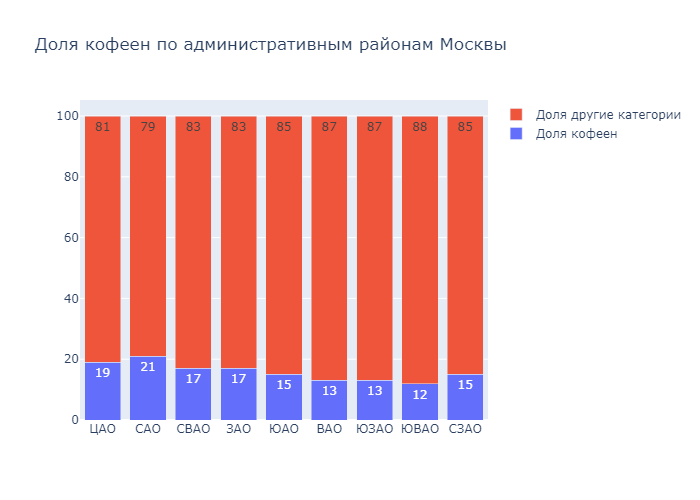

In [92]:
labels_coffee_district = coffee_district['Район']

values_coffee_district = coffee_district['Доля кофеен']
values2_coffee_district = coffee_district['Доля другие категории']

fig_coffee_district = go.Figure()
fig_coffee_district.add_trace(go.Bar(x = labels_coffee_district, y = values_coffee_district,
                                     name='Доля кофеен', text = values_coffee_district))
fig_coffee_district.add_trace(go.Bar(x = labels_coffee_district, y = values2_coffee_district,
                                     name='Доля другие категории', text = values2_coffee_district))
fig_coffee_district.update_layout(barmode='stack', title='Доля кофеен по административным районам Москвы')
fig_coffee_district.show('png')

<div style="border:solid green 2px; padding: 20px">

**Количество заведений 'кофейня' по районам.**

Всего кофеен: 1381.

Больше всего кофеен в ЦАО: 425 (доля кофеен в районе 19%).

Частота кофеен увеличивается с приближением к центру.

Самая большая доля кофеен относительно всех объектов в районе в САО (21%). На это скорее всего влияет сосредоточение сразу нескольких крупных ТЦ в одном районе (Метрополис, Авиапарк, Речной).

Самая маленькая доля кофеен относительно всех объектов в районе в ЮВАО (12%), как выявили ранее, в этом районе самый низкий средний чек и самый низкий рейтинг заведений. Поэтому даже маленькая доля кофеен не делает данный район перспективным для нового открытия.


</div>

### Круглосуточные кофейни

<div style="border:solid black 2px; padding: 20px">

Проверим, есть ли круглосуточные кофейни.

Отметим, что часы работы заполнены не у всех заведений, поэтому количество объектов будет отличаться.

</div>

In [93]:
coffee_is_24_7_total = data[data['category'] == 'кофейня']\
                      .pivot_table(index='is_24_7', values='name', aggfunc='count')\
                      .reset_index().rename(columns={'name':'Количество', 'is_24_7':'Ежедневно, круглосуточно'})\
                      .sort_values('Количество', ascending=False)
coffee_is_24_7_total['Доля'] = round((coffee_is_24_7_total['Количество']
                                      / coffee_is_24_7_total['Количество'].sum()) * 100, 1)
coffee_is_24_7_total

,"Ежедневно, круглосуточно",Количество,Доля
0,False,1308,95.8
1,True,58,4.2


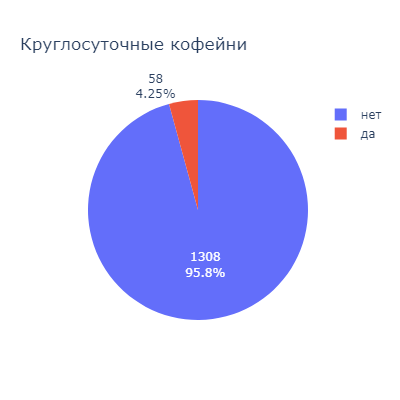

In [94]:
fig_coffee_is_24_7_total = px.pie(coffee_is_24_7_total, values='Количество', 
                                  names=coffee_is_24_7_total['Ежедневно, круглосуточно'].map({True: 'да', False: 'нет'}), 
                                  title='Круглосуточные кофейни')
fig_coffee_is_24_7_total.update_traces(textinfo='value + percent')
fig_coffee_is_24_7_total.update_layout(width=400, height=400)
fig_coffee_is_24_7_total.show('png')

In [95]:
# Строим сводную таблицу
coffee_is_24_7 = data[data['category'] == 'кофейня']\
                     .pivot_table(index='district_type', columns='is_24_7', values='name', aggfunc='count')\
                     .reset_index()\
                     .rename(columns={'district_type':'Район', 0:'Другой режим работы', 1:'Ежедневно, круглосуточно'})
coffee_is_24_7['Итого'] = coffee_is_24_7[['Другой режим работы', 'Ежедневно, круглосуточно']].sum(axis=1)
coffee_is_24_7 = coffee_is_24_7.sort_values(by='Итого', ascending=False)
coffee_is_24_7['Доля круглосуточных'] = round((coffee_is_24_7['Ежедневно, круглосуточно']
                                               / coffee_is_24_7['Итого']) * 100, 1)
coffee_is_24_7.style.format({'Доля круглосуточных':'{:.1f}'})\
              .background_gradient(cmap='Blues', axis=0)\
              .set_caption('Количество кофеен по часам работы по районам')

is_24_7,Район,Другой режим работы,"Ежедневно, круглосуточно",Итого,Доля круглосуточных
5,ЦАО,397,26,423,6.1
2,САО,183,5,188,2.7
3,СВАО,147,3,150,2.0
1,ЗАО,133,9,142,6.3
6,ЮАО,127,1,128,0.8
0,ВАО,94,5,99,5.1
8,ЮЗАО,86,6,92,6.5
7,ЮВАО,83,1,84,1.2
4,СЗАО,58,2,60,3.3


<div style="border:solid green 2px; padding: 20px">

**Круглосуточные кофейни**

Маленькая доля кофеен, которые работают ежедневно и круглосуточно (4.2%).

В основном все объекты данного формата находятся в ЦАО.

Есть свои особенности и соответственно риски при круглосуточном режиме работы. И как мы видим исходя из доли данных заведений, многие предприниматели решают на себя не брать эти риски.

Рекомендация на момент открытия сразу не использовать режим работы 'ежедневно и круглосуточно'.

</div>

### Распределение рейтингов кофеен по районам

<div style="border:solid black 2px; padding: 20px">

Визуализируем распределение средних рейтингов кофеен по районам.

</div>

In [96]:
# Строим сводную таблицу
coffee_rating = data[data['category'] == 'кофейня']\
                 .pivot_table(index='district_type', values=['name', 'rating'], aggfunc={'name': 'count', 'rating': 'mean'})\
                 .reset_index()\
                 .rename(columns={'rating':'Средний рейтинг','district_type':'Район','name':'Количество объектов'})\
                 .sort_values('Средний рейтинг', ascending=False)
coffee_rating['Средний рейтинг'] = coffee_rating['Средний рейтинг'].round(2)
coffee_rating.style.format({'Средний рейтинг':'{:.2f}'})\
               .background_gradient(cmap='Blues', axis=0)

,Район,Количество объектов,Средний рейтинг
5,ЦАО,425,4.34
4,СЗАО,60,4.33
2,САО,190,4.30
0,ВАО,102,4.28
8,ЮЗАО,94,4.28
6,ЮАО,129,4.24
7,ЮВАО,85,4.21
3,СВАО,152,4.21
1,ЗАО,144,4.20


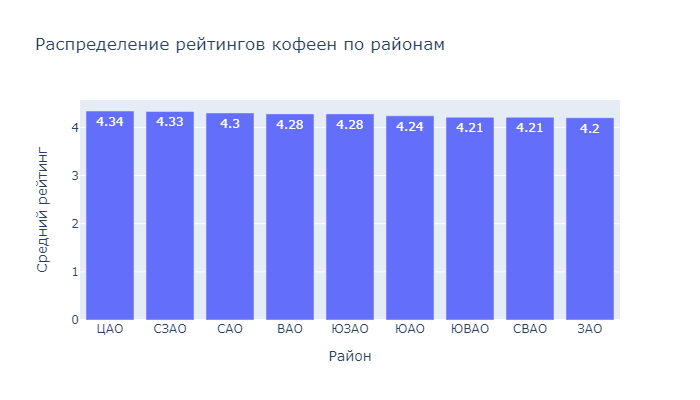

In [97]:
fig_coffee_rating_new = px.bar(data_frame=coffee_rating, x='Район', y='Средний рейтинг', height=400,
                         text = 'Средний рейтинг', title='Распределение рейтингов кофеен по районам')
fig_coffee_rating_new.show('png')

<div style="border:solid green 2px; padding: 20px">

**Распределение рейтингов кофеен по районам.**

Рейтинги кофеен по районам распределены в диапазоне 4.2-4.34, можно сказать, что рейтинги не отличаются.

Самый высокий рейтинг в ЦАО 4.34.
Самый низкий рейтинг в ЗАО 4.2.

</div>

### Средний чек и средняя цена чашки капучино кофеен

<div style="border:solid black 2px; padding: 20px">

Рассмотрим: какой средний чек и средняя цена чашки капучино кофеен по районам.

</div>

In [98]:
# основные статистические данные по столбцам
data[data['category'] == 'кофейня'][['middle_avg_bill', 'middle_coffee_cup']].describe().round()

,middle_avg_bill,middle_coffee_cup
count,196.0,519.0
mean,618.0,175.0
std,505.0,90.0
min,0.0,60.0
25%,300.0,124.0
50%,400.0,170.0
75%,762.0,225.0
max,2500.0,1568.0


In [99]:
# Строим сводную таблицу
coffee_avg = data[data['category'] == 'кофейня']\
                 .pivot_table(index='all', values=['middle_avg_bill', 'middle_coffee_cup'], aggfunc='median')\
                 .rename(columns={'middle_avg_bill':'Средний чек','middle_coffee_cup':'Средняя цена чашки капучино'})

coffee_avg.style.format({'Средний чек':'{:.0f}', 'Средняя цена чашки капучино':'{:.0f}'})\
          .set_caption('Средний чек и средняя цена чашки капучино кофеен')

,Средний чек,Средняя цена чашки капучино
all,,
all,400,170


In [100]:
# Строим сводную таблицу
coffee_avg = data[data['category'] == 'кофейня']\
                 .pivot_table(index='district_type', values=['middle_avg_bill', 'middle_coffee_cup'], aggfunc='median')\
                 .reset_index()\
                 .rename(columns={'middle_avg_bill': 'Средний чек',
                                  'district_type': 'Район', 'middle_coffee_cup': 'Средняя цена чашки капучино'})\
                 .sort_values(by='Средний чек', ascending=False)
coffee_avg['Средний чек'] = coffee_avg['Средний чек'].round(0)
coffee_avg['Средняя цена чашки капучино'] = coffee_avg['Средняя цена чашки капучино'].round(0)
coffee_avg.style.format({'Средний чек':'{:.0f}', 'Средняя цена чашки капучино':'{:.0f}'})\
          .background_gradient(cmap='Blues', axis=0)\
          .set_caption('Средний чек и средняя цена чашки капучино кофеен')

,Район,Средний чек,Средняя цена чашки капучино
1,ЗАО,600,189
5,ЦАО,500,190
0,ВАО,400,135
8,ЮЗАО,375,198
6,ЮАО,350,150
4,СЗАО,344,165
3,СВАО,338,160
2,САО,325,159
7,ЮВАО,250,148


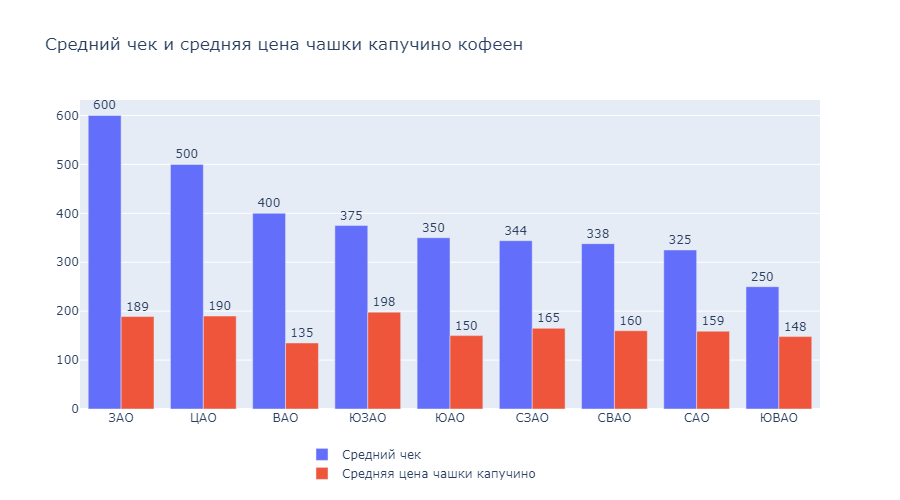

In [101]:
# строим столбчатую диаграмму 
fig_coffee_avg = go.Figure()
fig_coffee_avg.add_trace(go.Bar(x=coffee_avg['Район'], y=coffee_avg['Средний чек'],
                                name='Средний чек', text = coffee_avg['Средний чек'], textposition='outside'))
fig_coffee_avg.add_trace(go.Bar(x=coffee_avg['Район'], y=coffee_avg['Средняя цена чашки капучино'],
                                name='Средняя цена чашки капучино', text = coffee_avg['Средняя цена чашки капучино'],
                                textposition='outside'))
fig_coffee_avg.update_layout(title_text='Средний чек и средняя цена чашки капучино кофеен',
                             width=900, height=500,
                             legend=dict(yanchor='top', y=-0.1, xanchor='left', x=0.3))
fig_coffee_avg.show('png')

<div style="border:solid green 2px; padding: 20px">

**Средний чек и средняя цена чашки капучино кофеен.**

Средний чек кофеен (медианное значение) значительно различается по районам.
* Для всех кофеен Москвы средний чек 400р.
* Самый высокий средний чек ЦАО: 600р.
* Самый низкий средний чек ЮВАО: 250р.

Средняя цена чашки капучино (медианное значение).
* Для всех кофеен Москвы средняя цена чашки капучино 170р.
* Самый высокий средний чек ЮЗАО: 198р.
* Самый низкий средний чек ВАО: 135р.

Предполагаем, что при открытии кофейни стоит ориентироваться на медианное значение для всех районов 170р. Так как мы располагаем маленьким количеством данных по этому пункту.

</div>

### Вывод

<div style="border:solid blue 2px; padding: 20px">

**Вывод по исследованию кофеен Москвы.**

---

**Количество заведений 'кофейня' по районам.**

Всего кофеен: 1381.

Больше всего кофеен в ЦАО: 425 (доля кофеен в районе 19%).

Частота кофеен увеличивается с приближением к центру.

Самая большая доля кофеен относительно всех объектов в районе в САО (21%). На это скорее всего влияет сосредоточение сразу нескольких крупных ТЦ в одном районе (Метрополис, Авиапарк, Речной).

Самая маленькая доля кофеен относительно всех объектов в районе в ЮВАО (12%), как выявили ранее, в этом районе самый низкий средний чек и самый низкий рейтинг заведений. Поэтому даже маленькая доля кофеен не делает данный район перспективным для нового открытия.

---

**Круглосуточные кофейни**

Маленькая доля кофеен, которые работают ежедневно и круглосуточно (4.2%).

В основном все объекты данного формата находятся в ЦАО.

Есть свои особенности и соответственно риски при круглосуточном режиме работы. И как мы видим исходя из доли данных заведений, многие предприниматели решают на себя не брать эти риски.

Рекомендация на момент открытия сразу не использовать режим работы 'ежедневно и круглосуточно'.

---

**Распределение рейтингов кофеен по районам.**

Рейтинги кофеен по районам распределены в диапазоне 4.2-4.34, можно сказать, что рейтинги не отличаются.

---

**Средний чек и средняя цена чашки капучино кофеен.**

Средний чек кофеен (медианное значение) значительно различается по районам.
* Для всех кофеен Москвы средний чек 400р.
* Самый высокий средний чек ЦАО: 600р.
* Самый низкий средний чек ЮВАО: 250р.

Средняя цена чашки капучино (медианное значение).
* Для всех кофеен Москвы средняя цена чашки капучино 170р.
* Самый высокий средний чек ЮЗАО: 198р.
* Самый низкий средний чек ВАО: 135р.

Предполагаем, что при открытии кофейни стоит ориентироваться на медианное значение для всех районов 170р. Так как мы располагаем маленьким количеством данных по этому пункту.


</div>

### Рекомендации для открытия нового заведения (кофейня)

<div style="border:solid blue 2px; padding: 20px">

**<p style="text-align:center">Рекомендации для открытия нового заведения (кофейня).</p>**

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве.

Кофейня как «Central Perk». Что делает ее особенной по сериалу:

* Местоположение: Кофейня находится рядом с достопримечательностью (Центральный парк Нью-Йорка).
* Ассортимент: кофейня обладает широким ассортиментом кофе, а также всевозможными десертами.
* Обстановка: уютная атмосфера с интересными декоративными элементами.
* Размер помещения, посадочные места.
* Название: по информации из разных источников название несет за собой ассоциацию с достопримечательностью (Central от названия Central park), а также «фишку»: слово Perk (сокращение от percolate — «заваривать кофе» или perk up – «взбодриться»).
* Тематика: привязка к популярности сериала.

Учитывая особенности кафе из сериала, а также пожелания заказчиков, рассмотрим перспективу и предложим варианты решений по местоположению объекта.

**Местоположение.**

В анализе данных по количеству заведений в административных округах увидели, что рынок заведений ЦАО значительно насыщен и конкуренция в нем наивысшая. Также ЦАО обладает наименьшей площадью (см ниже) из всех рассматриваемых округов, в связи с чем, предположительно, в нем самая дорогая аренда. Поэтому ЦАО мы не рассматриваем.

[Административно-территориальное деление Москвы](https://ru.wikipedia.org/wiki/Административно-территориальное_деление_Москвы)

Выстраивать поиск локации мы будем по следующим критериям:
* Локация заведения должна быть на границе ЦАО и с другими административными округами, для возможности привлечения трафика из ЦАО.
* Недалеко от заведения должна быть достопримечательность, желательно парк, которая генерирует трафик.
* Хорошая транспортная доступность. Большинство достопримечательностей Москвы обладают хорошей транспортной доступностью, мы лишь будем обращать на нее внимание.
* Низкая доля заведений формата 'кофейня'.

К ЦАО примыкают районы:
* Дорогомилово (ЗАО)
* Даниловский (ЮАО)
* Нижегородский (ЮВАО)
* Лефортово (ЮВАО)
* Соколиная Гора (ВАО)
* Сокольники (ВАО)
* Марьина Роща (СВАО)
* Беговой (САО)
* Хорошево-Мневники (СЗАО)

Обратим внимание на данные из пункта 'Количество заведений 'кофейня' по районам'. Выявим округ с низкой долей кофеен относительно остальных заведений, а также посмотрим, есть в округе район, в котором есть крупный парк, который ближе всех к ЦАО.

Таким районом является Сокольники, который находится в ВАО.

Как результат, данный район обладает следующими характеристиками:
* Всего объектов 779 (6 место рейтинга);
* Объектов категории 'кофейня' 102;
* Доля объектов типа «кофейня» в округе 13%;
* Парк ежедневно посещает большое количество посетителей, что может обеспечить привлечение хорошего трафика;
* Парк обладает хорошей транспортной доступностью (станция метро рядом с парком);
* Стоимость аренды объектов коммерческой недвижимости ВАО существенно ниже, чем средняя стоимость по Москве.

[Исследование ценовых показателей рынка коммерческой недвижимости Москвы.](https://docs.yandex.ru/docs/view?tm=1720294240&tld=ru&lang=ru&name=Valrus_Moscow%20CRE%20Market_2018-2020.pdf&text=рейтинг%20стоимости%20аренды%20коммерческой%20недвижимости%20по%20районам%20москвы&url=https%3A%2F%2Fvalrus.com%2Fupload%2Fmedialibrary%2FValrus_Moscow%2520CRE%2520Market_2018-2020.pdf&lr=213&mime=pdf&l10n=ru&sign=467187777b3e79362fe24e2b9b4ee652&keyno=0&nosw=1&serpParams=tm%3D1720294240%26tld%3Dru%26lang%3Dru%26name%3DValrus_Moscow%2520CRE%2520Market_2018-2020.pdf%26text%3D%25D1%2580%25D0%25B5%25D0%25B9%25D1%2582%25D0%25B8%25D0%25BD%25D0%25B3%2B%25D1%2581%25D1%2582%25D0%25BE%25D0%25B8%25D0%25BC%25D0%25BE%25D1%2581%25D1%2582%25D0%25B8%2B%25D0%25B0%25D1%2580%25D0%25B5%25D0%25BD%25D0%25B4%25D1%258B%2B%25D0%25BA%25D0%25BE%25D0%25BC%25D0%25BC%25D0%25B5%25D1%2580%25D1%2587%25D0%25B5%25D1%2581%25D0%25BA%25D0%25BE%25D0%25B9%2B%25D0%25BD%25D0%25B5%25D0%25B4%25D0%25B2%25D0%25B8%25D0%25B6%25D0%25B8%25D0%25BC%25D0%25BE%25D1%2581%25D1%2582%25D0%25B8%2B%25D0%25BF%25D0%25BE%2B%25D1%2580%25D0%25B0%25D0%25B9%25D0%25BE%25D0%25BD%25D0%25B0%25D0%25BC%2B%25D0%25BC%25D0%25BE%25D1%2581%25D0%25BA%25D0%25B2%25D1%258B%26url%3Dhttps%253A%2F%2Fvalrus.com%2Fupload%2Fmedialibrary%2FValrus_Moscow%252520CRE%252520Market_2018-2020.pdf%26lr%3D213%26mime%3Dpdf%26l10n%3Dru%26sign%3D467187777b3e79362fe24e2b9b4ee652%26keyno%3D0%26nosw%3D1)

**Круглосуточные кофейни**

Маленькая доля кофеен, которые работают ежедневно и круглосуточно (4.2%).

В основном все объекты данного формата находятся в ЦАО.

Есть свои особенности и соответственно риски при круглосуточном режиме работы. И как мы видим исходя из доли данных заведений, многие предприниматели решают на себя не брать эти риски.

Рекомендация на момент открытия сразу не использовать режим работы 'ежедневно и круглосуточно'.


**Средний чек и средняя цена чашки капучино кофеен.**

Средний чек кофеен (медианное значение) значительно различается по районам.
* Для всех кофеен Москвы средний чек 400р.
* Самый высокий средний чек ЦАО: 600р.
* Самый низкий средний чек ЮВАО: 250р.

Средняя цена чашки капучино (медианное значение).
* Для всех кофеен Москвы средняя цена чашки капучино 170р.
* Самый высокий средний чек ЮЗАО: 198р.
* Самый низкий средний чек ВАО: 135р.

Предполагаем, что при открытии кофейни стоит ориентироваться на медианное значение для всех районов 170р. Так как мы располагаем маленьким количеством данных по этому пункту.    
    
    
**Таким образом, для наилучшего осуществления мечты инвесторов, рекомендована локация вблизи парка Сокольники, которая характеризуется привлекательной с точки зрения: локации относительно ЦАО, близостью крупного парка, малой долей заведений схожего формата в районе, относительно недорогой стоимостью арены недвижимости, предположительно высоким трафиком.**

**Однако, также рекомендовано провести дополнительный анализ локальных конкурентов района Сокольники, не вошедших в предоставленную статистику (Вкусно и точка, Ростикс, и другие).**

<div>

[Начало_проекта](#Начало)

<a id="презентация"></a>

## Презентация исследования для инвесторов

<div style="border:solid black 2px; padding: 20px">

Презентация: [Исследование рынка заведений общественного питания Москвы](https://disk.yandex.ru/i/L7HR04sOIQnmfw)

</div>

[Начало_проекта](#Начало)

<a id="итоги"></a>

## Итоги исследования

<div style="border:solid blue 2px; padding: 20px">

***  
<span style="color:green;font-weight:700;font-size:15px">***Выводы по исследовательскому анализу данных.***</span>
***

**Количество объектов общественного питания по категориям.**

* 2 категории (**кафе и рестораны**) занимают долю 52.6%. Это виды категорий с наиболее широким ассортиментом.
* Третья по доле категория **кофейня** (доля 16.7%). Кофейня - это заведение с более ограниченным ассортиментом. Как правило в меню в основном присутствуют: кофе, чай, выпечка. А также в кофейне меньшее количество сотрудников, чем в кафе и ресторанах.
* Четвертая по доле категория **бар,паб** (доля 9.18%). Категория предполагает ограниченную аудиторию по факторам продажи алкогольной продукции и работы в ночное время суток. Также с этими факторами связаны риски для владельцев данной категории.
* **Пиццерия** доля 7.6% и **быстрое питание** доля 7.03%.
* Самые маленькие доли у категорий **столовая и булочная** (в среднем 3.4%).

---

**Количество посадочных мест в заведениях по категориям.**

* Среднее количество посадочных мест: 108
* Медиана количества посадочных мест: 75
* Третий квартиль (Q3) по категориям находится в диапазоне: 120-150 посадочных мест.

На гистограмме видим пик количества значений в диапазоне 40-49 посадочных мест. А также видим длинный хвост из больших значений.

Медиана топовых категорий (по количеству заведений):
* кафе: 60
* ресторан: 86
* кофейня: 80

Доля заведений, где посадочных мест '0' маленькая: 3%.

---

**Соотношение сетевых и несетевых заведений.**

| Тип      |  Количество  | Доля (%)| 
|:---------|:------------:|:-------:| 
|Несетевые | 5193         | 62.7    | 
|Сетевые   | 3084         | 37.3    | 

По количеству заведений основная доля у несетевых объектов (62.7%).

---

**Соотношение сетевых и несетевых заведений в разрезе категорий.**

Топ-3 сетевых категории по количеству объектов: 'кафе', 'ресторан', 'кофейня'.

Стоит обратить внимание на то, что в категориях 'кофейня', 'пиццерия' равная доля сетевых и несетевых заведений.

В категории 'бар,паб' значительно преобладают несетевые заведения.

---

**Топ-15 популярных сетей в Москве:**

*Шоколадница, Домино'с Пицца, Додо Пицца, One Price Coffee, Яндекс Лавка, Cofix, Prime, КОФЕПОРТ, Кулинарная лавка братьев Караваевых, Теремок, Буханка, CofeFest, Му-Му, Чайхана, Drive Café*

* 5 из 15 топовых объектов относятся к категории 'кофейня' (доля по количеству объектов 41.8% от всех топ-15).

* Стоит отметить категорию 'пиццерия'. В сетевой части бизнеса фактически 2 игрока держат рынок пиццерий ('Домино'с Пицца' и 'Додо Пицца').

* Довольно большой разброс по среднему чеку в данных объектах. Самый высокий средний чек в сети 'Шоколадница'.
  
* В список попала 1 сеть категории булочная 'Буханка'. Если смотреть на ассортимент данной сети, то скорее данную сети можно к категории кофейня. Категория 'булочная', скорее некий маркетинговых ход, чем отражение некой реальной особенности.
  
* Есть видимое несоответствие категории и ассортимента, который представлен в сети. Например, сеть Шоколадница имеет широкий ассортимент различных блюд и скорее относится к категориям кафе или ресторан, чем кофейня. Или, например, 'Теремок' и 'Prime' сложно отнести к категории ресторан в привычном смысле слова. Можно сделать вывод, что присвоение категории заведениям общественного питания может быть связано не с реальными характеристиками объектов, а с другими факторами как маркетинг, лицензия и другие.

---

**Объекты общественного питания по административным районам Москвы.**

В данных представлены 9 административных районов Москвы.

Доля по количеству объектов:
* Основная доля объектов находится в ЦАО (26.9%).
* В остальных районах доля объектов в диапазоне от 8.41% до 10.7%.
* Меньше всего объектов в СЗАО (доля 4.87%).
  
Во всех районах превалируют категории кафе и рестораны.

Категории 'бар,паб' и 'рестораны' в большей степени сосредоточены в ЦАО.

Меньше всего численность населения в ЦАО, при этом самая большая доля по количеству объектов общественного питания. По этому соотношению ЦАО можем определить, как район, где сосредоточена значительная социальная жизнь города (работа, отдых).

В СЗАО меньше всего объектов общественного питания, но и доля численности населения самая маленькая. Если смотреть разницу долей с другими районами (не считая ЦАО), то соотношение долей находится в пределах нормы.

Большинство заведений находятся в центральной части Москвы.

---

**Рейтинги объектов общественного питания по категориям.**

Рейтинги в разных категориях не сильно различаются и все находятся в одном диапазоне психологического восприятия оценки (от 4 до 4.5).

Самый высокий рейтинг у категорий 'бар,паб' 4.4. Самый низкий рейтинг у категории 'быстрое питание' 4.

---

**Средний рейтинг заведений по районам.**

У большинства районов средний рейтинг заведений 4.2.

Самый высокий рейтинг у района ЦАО 4.4. Самый низкий рейтинг у района ЮВАО 4.1.

Основная доля рейтингов заведений (69.4%) находится в диапазоне 4-4.5.

Очень маленькая доля рейтингов с оценкой меньше 3 (2.5%).

---

**Топ-15 улиц по количеству заведений.**

*проспект Мира, Профсоюзная улица, проспект Вернадского, Ленинский проспект, Ленинградский проспект, Дмитровское шоссе, Каширское шоссе, Варшавское шоссе, Ленинградское шоссе, МКАД, Люблинская улица, улица Вавилова, Кутузовский проспект, улица Миклухо-Маклая, Пятницкая улица*

Исключительная особенность улиц в данном списке это то, что все они очень длинные. Исключение Пятницкая улица протяженностью 1.8км.

Также стоит отметить, что больше половины улиц из данного списка относятся к нескольким административным районам.

Средний чек значительно различается в разрезе улиц. Самый высокий средний чек у улиц Каширское шоссе и Кутузовский проспект. Самый низкий средний чек у улиц Люблинская улица и МКАД. Это связано с аудиторией улиц. Например, покупки на МКАД вероятно включают напитки и выпечку или недорогие бизнес-ланчи, что априори не может сделать высокий чек относительно ресторанов на Кутузовском проспекте.

Важно отметить высокий рейтинг объектов на Пятницкой улице.

---

**Улицы, на которых находится только один объект общепита.**

В таблице 426 объектов общепита, где на улице находится только один объект.

Основную долю в данных объектах занимает категория 'кафе'.

Медианные значения основных показателей:
* Средний чек у данных объектов ниже чем у всех объектов (650р. к 750р.).
* Посадочных мест меньше чем у всех объектов (45 к 75).

Сетевых заведений среди данных объектов также меньше чем у всех объектов (доля сетевых 26.8% к 37.3%).

---

**Средний чек заведений по районам.**

Самый высокий средний чек в районах ЦАО и ЗАО (1000р.). Больше общего среднего чека на 33%.

Самый низкий средний чек в ЮВАО (450р.). Меньше общего среднего чека на 40%. Также мы ранее выявили, что в данном районе самый низкий рейтинг заведений 4.1.

Как мы видим, на средний чек скорее влияет не удаленность от центра, а престижность района.

---

**Особенности заведений с плохим рейтингом.**

Самая большая доля рейтинга с оценкой меньше 4 в категориях кафе и быстрое питание.

Медианное значение среднего чека значительно ниже в заведениях с низким рейтингом.

---

**Зависимость часов работы от категории заведения и района.**

Заведения, которые работают ежедневно и круглосуточно в основном имеют категорию кафе и расположены в ЦАО.

Меньше всего объектов, которые работают ежедневно и круглосуточно, в СЗАО, но в этом районе в целом меньше всего заведений.

---

**Категории цен по районам.**

Во всех районах большинство заведений имеют категорию цен 'средние'.

В ЦАО большая доля категории цен 'высокие' относительно остальных районов.

В ВАО большая доля категории цен 'низкие' относительно остальных районов.

***  
<span style="color:green;font-weight:700;font-size:15px">***Выводы по исследованию кофеен Москвы.***</span>
***


**Количество заведений 'кофейня' по районам.**

Всего кофеен: 1381.

Больше всего кофеен в ЦАО: 425 (доля кофеен в районе 19%).

Частота кофеен увеличивается с приближением к центру.

Самая большая доля кофеен относительно всех объектов в районе в САО (21%). На это скорее всего влияет сосредоточение сразу нескольких крупных ТЦ в одном районе (Метрополис, Авиапарк, Речной).

Самая маленькая доля кофеен относительно всех объектов в районе в ЮВАО (12%), как выявили ранее, в этом районе самый низкий средний чек и самый низкий рейтинг заведений. Поэтому даже маленькая доля кофеен не делает данный район перспективным для нового открытия.

---

**Круглосуточные кофейни**

Маленькая доля кофеен, которые работают ежедневно и круглосуточно (4.2%).

В основном все объекты данного формата находятся в ЦАО.

Есть свои особенности и соответственно риски при круглосуточном режиме работы. И как мы видим исходя из доли данных заведений, многие предприниматели решают на себя не брать эти риски.

Рекомендация на момент открытия сразу не использовать режим работы 'ежедневно и круглосуточно'.

---

**Распределение рейтингов кофеен по районам.**

Рейтинги кофеен по районам распределены в диапазоне 4.2-4.34, можно сказать, что рейтинги не отличаются.

---

**Средний чек и средняя цена чашки капучино кофеен.**

Средний чек кофеен (медианное значение) значительно различается по районам.
* Для всех кофеен Москвы средний чек 400р.
* Самый высокий средний чек ЦАО: 600р.
* Самый низкий средний чек ЮВАО: 250р.

Средняя цена чашки капучино (медианное значение).
* Для всех кофеен Москвы средняя цена чашки капучино 170р.
* Самый высокий средний чек ЮЗАО: 198р.
* Самый низкий средний чек ВАО: 135р.

Предполагаем, что при открытии кофейни стоит ориентироваться на медианное значение для всех районов 170р. Так как мы располагаем маленьким количеством данных по этому пункту.

***  
<span style="color:green;font-weight:700;font-size:15px">***Рекомендации для открытия нового заведения (кофейня).***</span>
***

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве.

Кофейня как «Central Perk». Что делает ее особенной по сериалу:

* Местоположение: Кофейня находится рядом с достопримечательностью (Центральный парк Нью-Йорка).
* Ассортимент: кофейня обладает широким ассортиментом кофе, а также всевозможными десертами.
* Обстановка: уютная атмосфера с интересными декоративными элементами.
* Размер помещения, посадочные места.
* Название: по информации из разных источников название несет за собой ассоциацию с достопримечательностью (Central от названия Central park), а также «фишку»: слово Perk (сокращение от percolate — «заваривать кофе» или perk up – «взбодриться»).
* Тематика: привязка к популярности сериала.

Учитывая особенности кафе из сериала, а также пожелания заказчиков, рассмотрим перспективу и предложим варианты решений по местоположению объекта.

**Местоположение.**

В анализе данных по количеству заведений в административных округах увидели, что рынок заведений ЦАО значительно насыщен и конкуренция в нем наивысшая. Также ЦАО обладает наименьшей площадью (см ниже) из всех рассматриваемых округов, в связи с чем, предположительно, в нем самая дорогая аренда. Поэтому ЦАО мы не рассматриваем.

[Административно-территориальное деление Москвы](https://ru.wikipedia.org/wiki/Административно-территориальное_деление_Москвы)

Выстраивать поиск локации мы будем по следующим критериям:
* Локация заведения должна быть на границе ЦАО и с другими административными округами, для возможности привлечения трафика из ЦАО.
* Недалеко от заведения должна быть достопримечательность, желательно парк, которая генерирует трафик.
* Хорошая транспортная доступность. Большинство достопримечательностей Москвы обладают хорошей транспортной доступностью, мы лишь будем обращать на нее внимание.
* Низкая доля заведений формата 'кофейня'.

К ЦАО примыкают районы:
* Дорогомилово (ЗАО)
* Даниловский (ЮАО)
* Нижегородский (ЮВАО)
* Лефортово (ЮВАО)
* Соколиная Гора (ВАО)
* Сокольники (ВАО)
* Марьина Роща (СВАО)
* Беговой (САО)
* Хорошево-Мневники (СЗАО)

Обратим внимание на данные из пункта 'Количество заведений 'кофейня' по районам'. Выявим округ с низкой долей кофеен относительно остальных заведений, а также посмотрим, есть в округе район, в котором есть крупный парк, который ближе всех к ЦАО.

Таким районом является Сокольники, который находится в ВАО.

Как результат, данный район обладает следующими характеристиками:
* Всего объектов 779 (6 место рейтинга);
* Объектов категории 'кофейня' 102;
* Доля объектов типа «кофейня» в округе 13%;
* Парк ежедневно посещает большое количество посетителей, что может обеспечить привлечение хорошего трафика;
* Парк обладает хорошей транспортной доступностью (станция метро рядом с парком);
* Стоимость аренды объектов коммерческой недвижимости ВАО существенно ниже, чем средняя стоимость по Москве.

[Исследование ценовых показателей рынка коммерческой недвижимости Москвы.](https://docs.yandex.ru/docs/view?tm=1720294240&tld=ru&lang=ru&name=Valrus_Moscow%20CRE%20Market_2018-2020.pdf&text=рейтинг%20стоимости%20аренды%20коммерческой%20недвижимости%20по%20районам%20москвы&url=https%3A%2F%2Fvalrus.com%2Fupload%2Fmedialibrary%2FValrus_Moscow%2520CRE%2520Market_2018-2020.pdf&lr=213&mime=pdf&l10n=ru&sign=467187777b3e79362fe24e2b9b4ee652&keyno=0&nosw=1&serpParams=tm%3D1720294240%26tld%3Dru%26lang%3Dru%26name%3DValrus_Moscow%2520CRE%2520Market_2018-2020.pdf%26text%3D%25D1%2580%25D0%25B5%25D0%25B9%25D1%2582%25D0%25B8%25D0%25BD%25D0%25B3%2B%25D1%2581%25D1%2582%25D0%25BE%25D0%25B8%25D0%25BC%25D0%25BE%25D1%2581%25D1%2582%25D0%25B8%2B%25D0%25B0%25D1%2580%25D0%25B5%25D0%25BD%25D0%25B4%25D1%258B%2B%25D0%25BA%25D0%25BE%25D0%25BC%25D0%25BC%25D0%25B5%25D1%2580%25D1%2587%25D0%25B5%25D1%2581%25D0%25BA%25D0%25BE%25D0%25B9%2B%25D0%25BD%25D0%25B5%25D0%25B4%25D0%25B2%25D0%25B8%25D0%25B6%25D0%25B8%25D0%25BC%25D0%25BE%25D1%2581%25D1%2582%25D0%25B8%2B%25D0%25BF%25D0%25BE%2B%25D1%2580%25D0%25B0%25D0%25B9%25D0%25BE%25D0%25BD%25D0%25B0%25D0%25BC%2B%25D0%25BC%25D0%25BE%25D1%2581%25D0%25BA%25D0%25B2%25D1%258B%26url%3Dhttps%253A%2F%2Fvalrus.com%2Fupload%2Fmedialibrary%2FValrus_Moscow%252520CRE%252520Market_2018-2020.pdf%26lr%3D213%26mime%3Dpdf%26l10n%3Dru%26sign%3D467187777b3e79362fe24e2b9b4ee652%26keyno%3D0%26nosw%3D1)

**Таким образом, для наилучшего осуществления мечты инвесторов, рекомендована локация вблизи парка Сокольники, которая характеризуется привлекательной с точки зрения: локации относительно ЦАО, близостью крупного парка, малой долей заведений схожего формата в районе, относительно недорогой стоимостью арены недвижимости, предположительно высоким трафиком.**

**Однако, также рекомендовано провести дополнительный анализ локальных конкурентов района Сокольники, не вошедших в предоставленную статистику (Вкусно и точка, Ростикс, и другие).**



</div>